In [1650]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib


In [1651]:
!pip install openpyxl


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Reading Data

In [1652]:
DataSet_path ="D:\Research\\1\\results for AI(Custom).xlsx"
df = pd.read_excel(DataSet_path)
seed =42

In [1653]:
df.head()

,code,Diabetic / pre-diabetic / Non-diabetic),gender,age,framingham score interpertation,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),BP,"HGB (M:13-17, F:12-15) /lab",...,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,diseases,EF%,"Anti-diabetic /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","b-blocker /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","complaint / non-complaint /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)"
0,1,non-diabetic,male,43.0,low,1.500000,23.333333,1.500000,110/70,8.7,...,0.554,3.7,1822.0,"confirmed infectve endocarditis, Rhematic hea...",0.55,no,no,NaN,"ampicillin/sulbactam, clindamycin, pantoprazol...",NaN
1,2,non-diabetic,male,46.0,high,1.722222,15.151515,1.111111,120/70,11.6,...,0.473,2.8,1565.0,rheumatic heart disease and suspected infectiv...,NaN,NaN,no,NaN,"teicoplanin, ampicillin/sulbactam, acetaminoph...",complaint
2,3,Diabetic,female,56.0,high,1.500000,15.151515,1.187500,130/80,11.6,...,0.410,0.7,1382.0,"recent NSTEMI, DM since 10 years, ACS since 2 ...",35-40,"glimepride (home), ARI (hospitalization)",empagliflozin 10 mg,bisoprolol,"asoirin, clopidogrel, heparin, atorvastatin, p...",complaint
3,4,Diabetic,male,54.0,high,1.347826,12.500000,1.434783,90/60,12.2,...,0.579,2.9,1747.0,"HFrEF, DM since 3 years, HTN, Hx OF ACS, Hx OF...",20-25,"metformin (home), ARI (hospitalization)",empagliflozin 10 mg,bisoprolol,"rivaroxiban , atorvastatin, pantoprazole, rami...",non-complaint
4,5,non-diabetic,male,36.0,low,1.583333,23.809524,1.250000,110/80,9.5,...,0.463,3.3,1545.0,"infective endocarditis, IV drug addict, cannab...",NaN,NaN,no,NaN,"linezolid, ceftazadime (DC), pantoprazole, ace...",NaN


- **code**: A unique identifier for each record.
- **Diabetic / pre-diabetic / Non-diabetic**: Indicates the diabetic status.
- **gender**: Gender of the individuals.
- **age**: Age of the individuals.
- **framingham score interpretation**: Interpretation of the Framingham score.
- **Valsalva ratio / Cardiac autonomic reflexes tests (CART)**: Results from certain cardiac tests.
- **BP**: Blood pressure readings.

In [1654]:
# Check for misaligned columns and empty columns
print(df.head())
print(df.columns)

   code Diabetic / pre-diabetic / Non-diabetic)  gender   age  \
0     1                            non-diabetic    male  43.0   
1     2                            non-diabetic    male  46.0   
2     3                                Diabetic  female  56.0   
3     4                                Diabetic    male  54.0   
4     5                            non-diabetic    male  36.0   

  framingham score interpertation  \
0                             low   
1                            high   
2                            high   
3                            high   
4                             low   

   Valsalva ratio/ Cardiac autonomic reflexes tests (CART)  \
0                                           1.500000         
1                                           1.722222         
2                                           1.500000         
3                                           1.347826         
4                                           1.583333         

   Deep breat

In [1655]:
df.describe()

,code,age,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,F. BGL (70-109) /lab,...,TSH (0.27-4.2) /lab,weight (kg) /body composition,Height (cm) /body composition,BMI /body composition,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition
count,102.000000,101.000000,100.000000,100.000000,98.000000,102.000000,101.000000,101.000000,102.000000,81.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,51.500000,43.940594,1.425299,25.464471,1.321958,12.762745,39.125743,82.810891,6.715686,105.654321,...,2.573446,80.838812,165.638614,29.573267,95.816832,0.418398,0.456410,0.482964,2.018072,1094.225301
std,29.588849,13.518004,0.350158,16.558111,0.249071,1.996776,5.435010,6.157855,2.204080,63.287669,...,3.593815,18.706719,8.941510,7.155402,16.270790,0.406803,0.048963,0.083246,1.180755,736.851720
min,1.000000,19.000000,1.000000,3.246753,0.904762,8.200000,26.600000,54.700000,4.900000,62.000000,...,0.030000,45.900000,150.000000,17.700000,65.000000,0.189000,0.368000,0.334000,0.500000,24.900000
25%,26.250000,35.000000,1.176471,15.113636,1.187500,11.525000,36.400000,80.500000,5.425000,78.000000,...,1.200000,66.400000,159.000000,24.600000,84.000000,0.337000,0.424000,0.424000,1.150000,51.100000
50%,51.500000,45.000000,1.355042,23.146882,1.269697,12.450000,38.600000,83.700000,5.700000,86.000000,...,1.840000,78.900000,164.000000,28.800000,94.000000,0.383000,0.450000,0.473000,1.700000,1416.000000
75%,76.750000,54.000000,1.574405,30.627828,1.384615,13.775000,42.100000,86.400000,6.800000,103.000000,...,2.730000,90.800000,173.000000,33.900000,109.000000,0.422000,0.484000,0.542000,2.750000,1566.500000
max,102.000000,70.000000,3.200000,104.448743,2.363636,19.700000,56.800000,92.900000,14.600000,380.000000,...,30.700000,132.600000,190.000000,52.500000,139.000000,4.030000,0.592000,0.715000,5.000000,2508.000000


### Split the "BP" col to two cols "systolic_BP" and "diastolic_BP"

In [1656]:
df['BP'].head()

0    110/70
1    120/70
2    130/80
3     90/60
4    110/80
Name: BP, dtype: object

In [1657]:
bp_split = df['BP'].str.split('/', expand=True)
# systolic_BP - > Top number in a blood pressure reading
# Diastolic blood pressure is the bottom number and refers to the amount of pressure in the arteries while the heart is resting in between heartbeats.
df['systolic_BP'] = pd.to_numeric(bp_split[0], errors='coerce')
df['diastolic_BP'] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop(['BP'] , axis=1 ,inplace=True)

### check nulls or missing values in DataSet

In [1658]:
df.isna().sum()

code                                                                                                                                          0
Diabetic / pre-diabetic / Non-diabetic)                                                                                                       0
gender                                                                                                                                        0
age                                                                                                                                           1
framingham score interpertation                                                                                                              19
Valsalva ratio/ Cardiac autonomic reflexes tests (CART)                                                                                       2
Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)                                                               

- we have many missing values here "random BGL /lab - > 78" we will drop it
- we have many missing values here "complaint / non-complaint /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)- > 53" we will drop it
- we have many missing values here "other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue) -> 43" we will drop it

In [1659]:
# Calculate the threshold
threshold = 0.5 * len(df)  # 50% of the number of rows

# Drop columns where the number of nulls is greater than the threshold
df = df.dropna(axis=1, thresh=threshold)

In [1660]:
df.median(numeric_only=True)

code                                                                           51.500000
age                                                                            45.000000
Valsalva ratio/ Cardiac autonomic reflexes tests (CART)                         1.355042
Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)      23.146882
stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)                1.269697
HGB (M:13-17, F:12-15) /lab                                                    12.450000
HT (M: 40-50, F: 36-46))/lab                                                   38.600000
MCV (83-101) /lab                                                              83.700000
HBA1C (<5.7) /lab                                                               5.700000
F. BGL (70-109) /lab                                                           86.000000
F. insulin (2.6-24.9)                                                           6.850000
HOMA-IR (<1.8) /lab  

In [1661]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [1662]:
df['framingham score interpertation'] = df['framingham score interpertation'].fillna(df['framingham score interpertation'].mode()[0])
df['diseases'] = df['diseases'].fillna(df['diseases'].mode()[0])
df['diseases'] = df['diseases'].fillna(df['diseases'].mode()[0])
df['SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)'] = df['SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)'].fillna(df["SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)"].mode()[0])


In [1663]:
df.isna().sum()

code                                                                                                                            0
Diabetic / pre-diabetic / Non-diabetic)                                                                                         0
gender                                                                                                                          0
age                                                                                                                             0
framingham score interpertation                                                                                                 0
Valsalva ratio/ Cardiac autonomic reflexes tests (CART)                                                                         0
Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)                                                       0
stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)                          

# Viualization of the DataSet

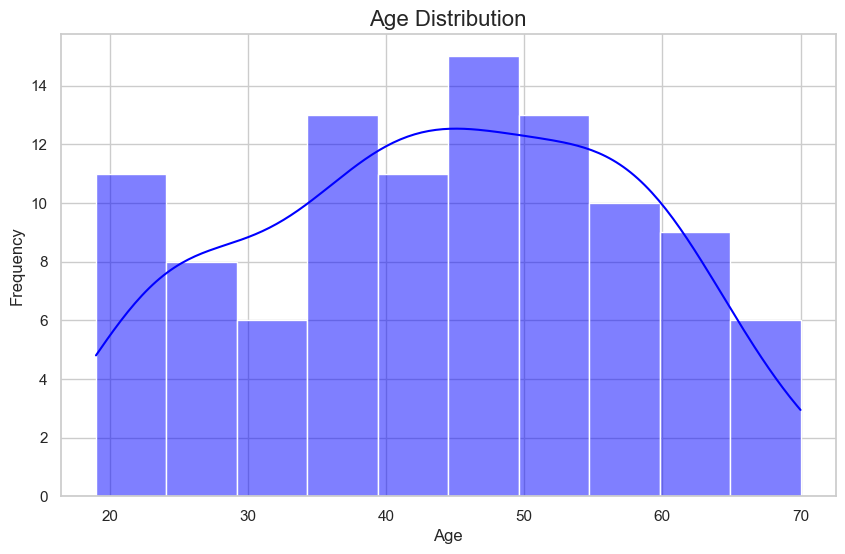

In [1664]:
# Set style for visualizations
sns.set(style="whitegrid")

# 1. Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, color='blue', bins=10)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()



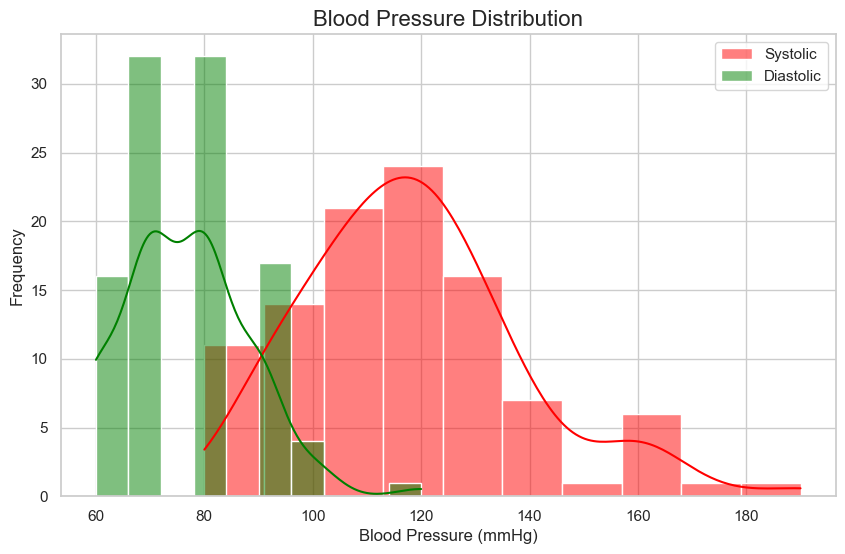

In [1665]:
# 2. Distribution of Systolic and Diastolic Blood Pressure
plt.figure(figsize=(10, 6))
sns.histplot(df['systolic_BP'], kde=True, color='red', bins=10, label="Systolic")
sns.histplot(df['diastolic_BP'], kde=True, color='green', bins=10, label="Diastolic")
plt.title("Blood Pressure Distribution", fontsize=16)
plt.xlabel("Blood Pressure (mmHg)")
plt.ylabel("Frequency")
plt.legend()
plt.show()



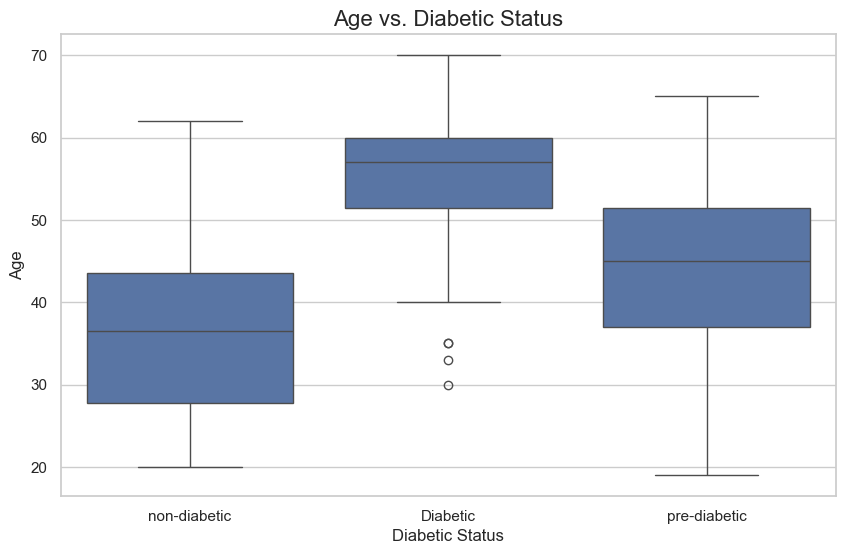

In [1666]:
# 4. Box plot of Age vs. Diabetic status
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetic / pre-diabetic / Non-diabetic)', y='age', data=df)
plt.title("Age vs. Diabetic Status", fontsize=16)
plt.xlabel("Diabetic Status")
plt.ylabel("Age")
plt.show()



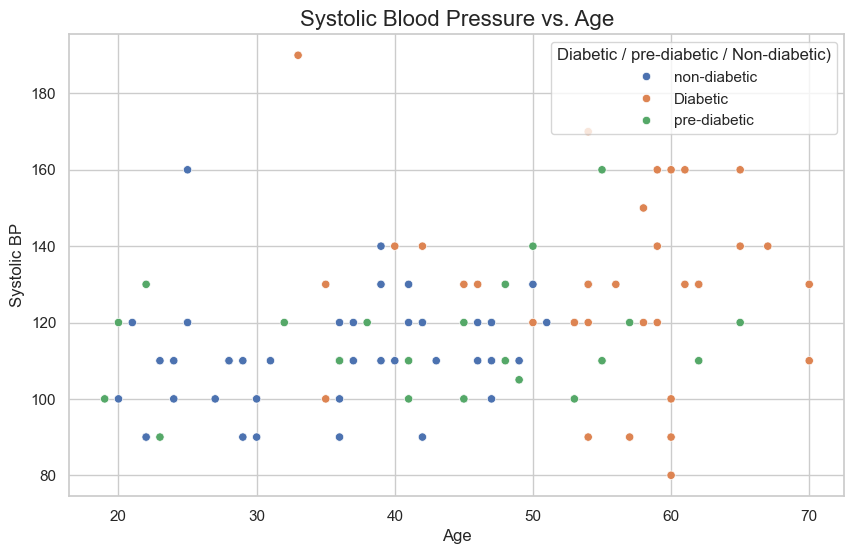

In [1667]:
# 5. Scatter plot between Systolic BP and Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='systolic_BP', hue='Diabetic / pre-diabetic / Non-diabetic)', data=df)
plt.title("Systolic Blood Pressure vs. Age", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Systolic BP")
plt.show()

In [1668]:
df.describe()

,code,age,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,F. BGL (70-109) /lab,...,Height (cm) /body composition,BMI /body composition,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,systolic_BP,diastolic_BP
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,...,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,51.500000,43.950980,1.423922,25.419028,1.319909,12.762745,39.120588,82.819608,6.715686,101.607843,...,165.622549,29.565686,95.799020,0.411804,0.455216,0.481108,1.958824,1154.163725,118.578431,76.568627
std,29.588849,13.451326,0.346812,16.396530,0.244302,1.996776,5.408287,6.127927,2.204080,56.888663,...,8.898614,7.120303,16.191041,0.366809,0.044189,0.075110,1.071166,675.766752,20.029402,11.474906
min,1.000000,19.000000,1.000000,3.246753,0.904762,8.200000,26.600000,54.700000,4.900000,62.000000,...,150.000000,17.700000,65.000000,0.189000,0.368000,0.334000,0.500000,24.900000,80.000000,60.000000
25%,26.250000,35.000000,1.179972,15.151515,1.187500,11.525000,36.425000,80.550000,5.425000,80.250000,...,159.000000,24.625000,84.250000,0.352000,0.428000,0.430000,1.225000,562.000000,106.250000,70.000000
50%,51.500000,45.000000,1.355042,23.146882,1.269697,12.450000,38.600000,83.700000,5.700000,86.000000,...,164.000000,28.800000,94.000000,0.383000,0.450000,0.473000,1.700000,1416.000000,120.000000,80.000000
75%,76.750000,54.000000,1.561905,30.542986,1.382212,13.775000,42.075000,86.350000,6.800000,99.750000,...,172.750000,33.825000,108.750000,0.414750,0.473250,0.526750,2.450000,1539.500000,130.000000,80.000000
max,102.000000,70.000000,3.200000,104.448743,2.363636,19.700000,56.800000,92.900000,14.600000,380.000000,...,190.000000,52.500000,139.000000,4.030000,0.592000,0.715000,5.000000,2508.000000,190.000000,120.000000


In [1669]:
df.describe(include='O')

,Diabetic / pre-diabetic / Non-diabetic),gender,framingham score interpertation,diseases,"SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","b-blocker /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)"
count,102,102,102,102,102,97,59
unique,3,2,3,72,5,7,59
top,non-diabetic,female,low,IBD,no,no,"ampicillin/sulbactam, clindamycin, pantoprazol..."
freq,44,62,60,30,80,67,1


1. ### code:
This is a unique identifier assigned to each record in the dataset. It likely represents individual participants in the study or survey.

2. ### Diabetic / pre-diabetic / Non-diabetic:
This column indicates the diabetic status of the individuals.
- Diabetic: The person has diabetes.
- Pre-diabetic: The person is at high risk of developing diabetes but has not yet developed it.
- Non-diabetic: The person does not have diabetes.
3. ### gender:
The gender of the individuals (likely either "male" or "female").

4. ### age:
The age of the individuals in years.

5. ### framingham score interpretation:
The Framingham score is a risk score used to estimate the 10-year cardiovascular risk of an individual.
Interpretation: Indicates the calculated risk (e.g., "Low Risk," "Moderate Risk," or "High Risk").

6. ### Valsalva ratio / Cardiac autonomic reflexes tests (CART):
The Valsalva ratio measures the heart's response to a specific breathing exercise. It’s used to assess autonomic nervous system function.
Cardiac Autonomic Reflexes Test (CART): A set of tests evaluating the autonomic regulation of the heart.

7. ### Deep breath: change in HR (bpm) / Cardiac autonomic reflexes tests (CART):
Measures the change in heart rate (HR) during deep breathing, another component of the CART.
This assesses how well the autonomic nervous system controls heart rate.

8. ### Stand test: 30:15 ratio / Cardiac autonomic reflexes tests (CART):
Another component of the CART tests.
Measures heart rate response during the stand test, which involves standing up after lying down.

9. ### BP (Blood Pressure):
This column provides a reading of the individual's blood pressure, typically written as systolic/diastolic.
Systolic BP: The pressure in your arteries when your heart beats.
Diastolic BP: The pressure in your arteries when your heart is resting between beats.

10. ### Blood glucose level:
The concentration of glucose (sugar) in the blood.
Used to determine the individual's blood sugar status, important for diagnosing diabetes.

11. ###  Waist circumference (cm):
Measures the waist circumference of the individual in centimeters.
A larger waist circumference is often linked with higher risks of cardiovascular disease and diabetes.

12. ### hip circumference (cm):
Measures the hip circumference in centimeters.

13. ### BMI (Body Mass Index):
A person's weight in kilograms divided by the square of height in meters (kg/m²).
Used as a measure of body fat, categorizing people as underweight, normal weight, overweight, or obese.

14. ### waist/hip ratio:
The ratio of waist circumference to hip circumference.
A higher waist-to-hip ratio is associated with increased risk for heart disease and type 2 diabetes.

15. ### fat percentage (%) / body composition:
The percentage of body fat, calculated from body composition analysis.
Higher fat percentages could indicate obesity or other health conditions.

16. ### muscle percentage (%) / body composition:
The percentage of the individual’s body weight that comes from muscle.
A higher muscle percentage usually indicates better physical fitness.

17. ### bone mass (kg) / body composition:
The mass of bones in kilograms, derived from a body composition test.
Bone mass is an indicator of bone density and overall skeletal health.

18. ### basal metabolic rate (Kcal) / body composition:
Basal Metabolic Rate (BMR) represents the amount of calories your body needs to perform basic functions at rest.
Higher BMR generally indicates higher muscle mass and greater energy requirements.

19. ### Systolic BP (extracted):
The systolic blood pressure value extracted from the "BP" column.
Represents the pressure in the arteries when the heart beats.

20. ### Diastolic BP (extracted):
The diastolic blood pressure value extracted from the "BP" column.
Represents the pressure in the arteries when the heart is at rest between beats.


In [1670]:
df['framingham score interpertation'].head()

0     low
1    high
2    high
3    high
4     low
Name: framingham score interpertation, dtype: object

In [1671]:
len(df.columns)

36

In [1672]:
df.drop(['code'] , axis=1 ,inplace=True)

In [1673]:
df.head()

,Diabetic / pre-diabetic / Non-diabetic),gender,age,framingham score interpertation,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,...,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,diseases,"SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","b-blocker /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)",systolic_BP,diastolic_BP
0,non-diabetic,male,43.0,low,1.500000,23.333333,1.500000,8.7,26.6,70.7,...,0.511,0.554,3.7,1822.0,"confirmed infectve endocarditis, Rhematic hea...",no,NaN,"ampicillin/sulbactam, clindamycin, pantoprazol...",110.0,70.0
1,non-diabetic,male,46.0,high,1.722222,15.151515,1.111111,11.6,37.2,84.5,...,0.533,0.473,2.8,1565.0,rheumatic heart disease and suspected infectiv...,no,NaN,"teicoplanin, ampicillin/sulbactam, acetaminoph...",120.0,70.0
2,Diabetic,female,56.0,high,1.500000,15.151515,1.187500,11.6,34.4,79.1,...,0.411,0.410,0.7,1382.0,"recent NSTEMI, DM since 10 years, ACS since 2 ...",empagliflozin 10 mg,bisoprolol,"asoirin, clopidogrel, heparin, atorvastatin, p...",130.0,80.0
3,Diabetic,male,54.0,high,1.347826,12.500000,1.434783,12.2,40.3,84.5,...,0.515,0.579,2.9,1747.0,"HFrEF, DM since 3 years, HTN, Hx OF ACS, Hx OF...",empagliflozin 10 mg,bisoprolol,"rivaroxiban , atorvastatin, pantoprazole, rami...",90.0,60.0
4,non-diabetic,male,36.0,low,1.583333,23.809524,1.250000,9.5,28.6,85.1,...,0.592,0.463,3.3,1545.0,"infective endocarditis, IV drug addict, cannab...",no,NaN,"linezolid, ceftazadime (DC), pantoprazole, ace...",110.0,80.0


# see if Target is Balanced or not

C:\Users\Mahmoud\AppData\Local\Temp\ipykernel_21008\875189368.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='framingham score interpertation', data=df, palette='coolwarm')


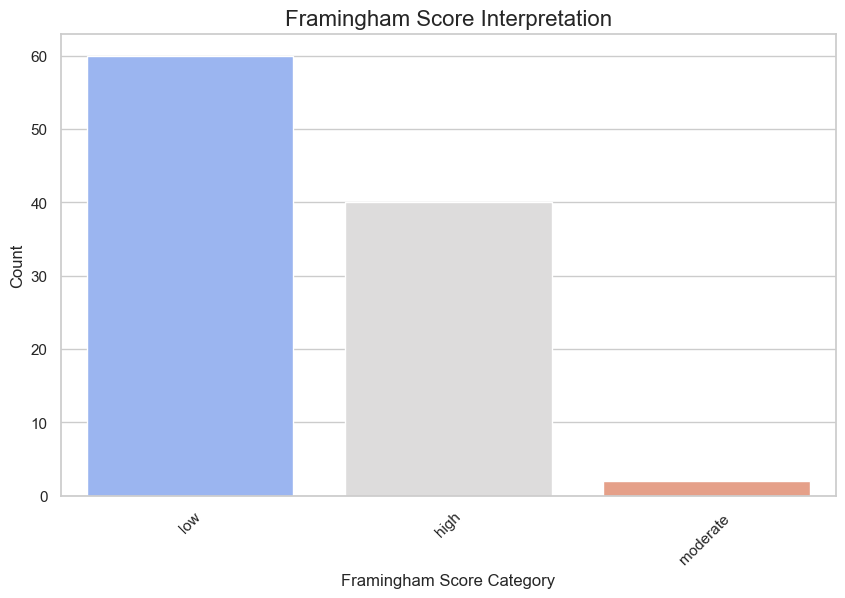

In [1674]:
# Create a bar plot for the "Framingham score interpretation" column
plt.figure(figsize=(10, 6))
sns.countplot(x='framingham score interpertation', data=df, palette='coolwarm')
plt.title("Framingham Score Interpretation", fontsize=16)
plt.xlabel("Framingham Score Category", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()

In [1675]:
df.head()

,Diabetic / pre-diabetic / Non-diabetic),gender,age,framingham score interpertation,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,...,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,diseases,"SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","b-blocker /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)",systolic_BP,diastolic_BP
0,non-diabetic,male,43.0,low,1.500000,23.333333,1.500000,8.7,26.6,70.7,...,0.511,0.554,3.7,1822.0,"confirmed infectve endocarditis, Rhematic hea...",no,NaN,"ampicillin/sulbactam, clindamycin, pantoprazol...",110.0,70.0
1,non-diabetic,male,46.0,high,1.722222,15.151515,1.111111,11.6,37.2,84.5,...,0.533,0.473,2.8,1565.0,rheumatic heart disease and suspected infectiv...,no,NaN,"teicoplanin, ampicillin/sulbactam, acetaminoph...",120.0,70.0
2,Diabetic,female,56.0,high,1.500000,15.151515,1.187500,11.6,34.4,79.1,...,0.411,0.410,0.7,1382.0,"recent NSTEMI, DM since 10 years, ACS since 2 ...",empagliflozin 10 mg,bisoprolol,"asoirin, clopidogrel, heparin, atorvastatin, p...",130.0,80.0
3,Diabetic,male,54.0,high,1.347826,12.500000,1.434783,12.2,40.3,84.5,...,0.515,0.579,2.9,1747.0,"HFrEF, DM since 3 years, HTN, Hx OF ACS, Hx OF...",empagliflozin 10 mg,bisoprolol,"rivaroxiban , atorvastatin, pantoprazole, rami...",90.0,60.0
4,non-diabetic,male,36.0,low,1.583333,23.809524,1.250000,9.5,28.6,85.1,...,0.592,0.463,3.3,1545.0,"infective endocarditis, IV drug addict, cannab...",no,NaN,"linezolid, ceftazadime (DC), pantoprazole, ace...",110.0,80.0


In [1676]:
df.columns

Index(['Diabetic / pre-diabetic / Non-diabetic)', 'gender', 'age',
       'framingham score interpertation',
       'Valsalva ratio/ Cardiac autonomic reflexes tests (CART)',
       'Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)',
       'stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)',
       'HGB (M:13-17, F:12-15) /lab', 'HT (M: 40-50, F: 36-46))/lab',
       'MCV (83-101) /lab', 'HBA1C (<5.7) /lab', 'F. BGL (70-109) /lab',
       'F. insulin (2.6-24.9)', 'HOMA-IR (<1.8) /lab',
       'T. cholesterol (<200) /lab', 'TG (<200) /lab', 'HDL >35) /lab',
       'LDL (<140) /lab', 'K (3.5-5.1) /lab', 'TSH (0.27-4.2) /lab',
       'weight (kg) /body composition', 'Height (cm) /body composition',
       'BMI /body composition', 'waiste circumference (cm) /body composition',
       'body fat (%) /body composition', 'body water (%) /body composition',
       'muscle percentage (%) /body composition',
       'bone mass (kg) /body composition',
     

In [1677]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 35 columns):
 #   Column                                                                                                                       Non-Null Count  Dtype  
---  ------                                                                                                                       --------------  -----  
 0   Diabetic / pre-diabetic / Non-diabetic)                                                                                      102 non-null    object 
 1   gender                                                                                                                       102 non-null    object 
 2   age                                                                                                                          102 non-null    float64
 3   framingham score interpertation                                                                                         

## Clustering data to Three classes


In [1678]:
y = df["Diabetic / pre-diabetic / Non-diabetic)"]
X = df.drop(['Diabetic / pre-diabetic / Non-diabetic)'],axis=1)

In [1679]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [1680]:
data_cleaned = df.drop(["other drugs /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)","b-blocker /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)",],axis=1) 

In [1681]:
data_cleaned.head(2)

,Diabetic / pre-diabetic / Non-diabetic),gender,age,framingham score interpertation,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,...,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,diseases,"SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)",systolic_BP,diastolic_BP
0,non-diabetic,male,43.0,low,1.500000,23.333333,1.500000,8.7,26.6,70.7,...,94.0,0.300,0.511,0.554,3.7,1822.0,"confirmed infectve endocarditis, Rhematic hea...",no,110.0,70.0
1,non-diabetic,male,46.0,high,1.722222,15.151515,1.111111,11.6,37.2,84.5,...,80.0,0.269,0.533,0.473,2.8,1565.0,rheumatic heart disease and suspected infectiv...,no,120.0,70.0


In [1682]:
# Drop the column "Diabetic / pre-diabetic / Non-diabetic"
data_without_diabetes =data_cleaned.drop(['Diabetic / pre-diabetic / Non-diabetic)'],axis=1)

In [1683]:
# Selecting only numerical columns for clustering
numeric_data = data_without_diabetes.select_dtypes(include=[np.number])

In [1684]:
numeric_data.columns

Index(['age', 'Valsalva ratio/ Cardiac autonomic reflexes tests (CART)',
       'Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)',
       'stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)',
       'HGB (M:13-17, F:12-15) /lab', 'HT (M: 40-50, F: 36-46))/lab',
       'MCV (83-101) /lab', 'HBA1C (<5.7) /lab', 'F. BGL (70-109) /lab',
       'F. insulin (2.6-24.9)', 'HOMA-IR (<1.8) /lab',
       'T. cholesterol (<200) /lab', 'TG (<200) /lab', 'HDL >35) /lab',
       'LDL (<140) /lab', 'K (3.5-5.1) /lab', 'TSH (0.27-4.2) /lab',
       'weight (kg) /body composition', 'Height (cm) /body composition',
       'BMI /body composition', 'waiste circumference (cm) /body composition',
       'body fat (%) /body composition', 'body water (%) /body composition',
       'muscle percentage (%) /body composition',
       'bone mass (kg) /body composition',
       'basal metabolic rate (Kcal) /body composition', 'systolic_BP',
       'diastolic_BP'],
      dtype=

In [1685]:
numeric_data

,age,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,F. BGL (70-109) /lab,F. insulin (2.6-24.9),...,Height (cm) /body composition,BMI /body composition,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,systolic_BP,diastolic_BP
0,43.0,1.500000,23.333333,1.500000,8.7,26.6,70.7,5.6,89.0,2.89,...,177.0,27.1,94.0,0.300,0.511,0.554,3.7,1822.0,110.0,70.0
1,46.0,1.722222,15.151515,1.111111,11.6,37.2,84.5,5.5,91.0,1.39,...,175.0,22.3,80.0,0.269,0.533,0.473,2.8,1565.0,120.0,70.0
2,56.0,1.500000,15.151515,1.187500,11.6,34.4,79.1,7.4,321.0,32.60,...,156.0,29.9,100.0,0.436,0.411,0.410,0.7,1382.0,130.0,80.0
3,54.0,1.347826,12.500000,1.434783,12.2,40.3,84.5,5.7,86.0,6.85,...,171.0,29.4,110.0,0.295,0.515,0.579,2.9,1747.0,90.0,60.0
4,36.0,1.583333,23.809524,1.250000,9.5,28.6,85.1,5.1,100.0,19.97,...,175.0,20.0,77.0,0.189,0.592,0.463,3.3,1545.0,110.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,51.0,1.166667,23.017903,1.200000,12.4,37.7,80.9,5.5,71.0,7.22,...,161.0,29.5,84.0,0.415,0.427,0.437,1.1,1438.0,120.0,80.0
98,24.0,2.230769,28.571429,1.400000,12.7,37.8,85.3,5.4,67.0,4.82,...,173.0,24.4,77.0,0.329,0.490,0.478,1.3,1559.0,110.0,70.0
99,50.0,1.500000,16.447368,1.250000,12.1,37.5,84.1,5.6,76.0,5.81,...,164.0,33.2,100.0,0.423,0.421,0.500,1.5,1568.0,130.0,90.0
100,20.0,1.647059,38.194444,1.461538,13.4,39.3,86.9,5.3,84.0,4.69,...,164.0,22.8,76.0,0.305,0.508,0.420,0.7,1445.0,100.0,60.0


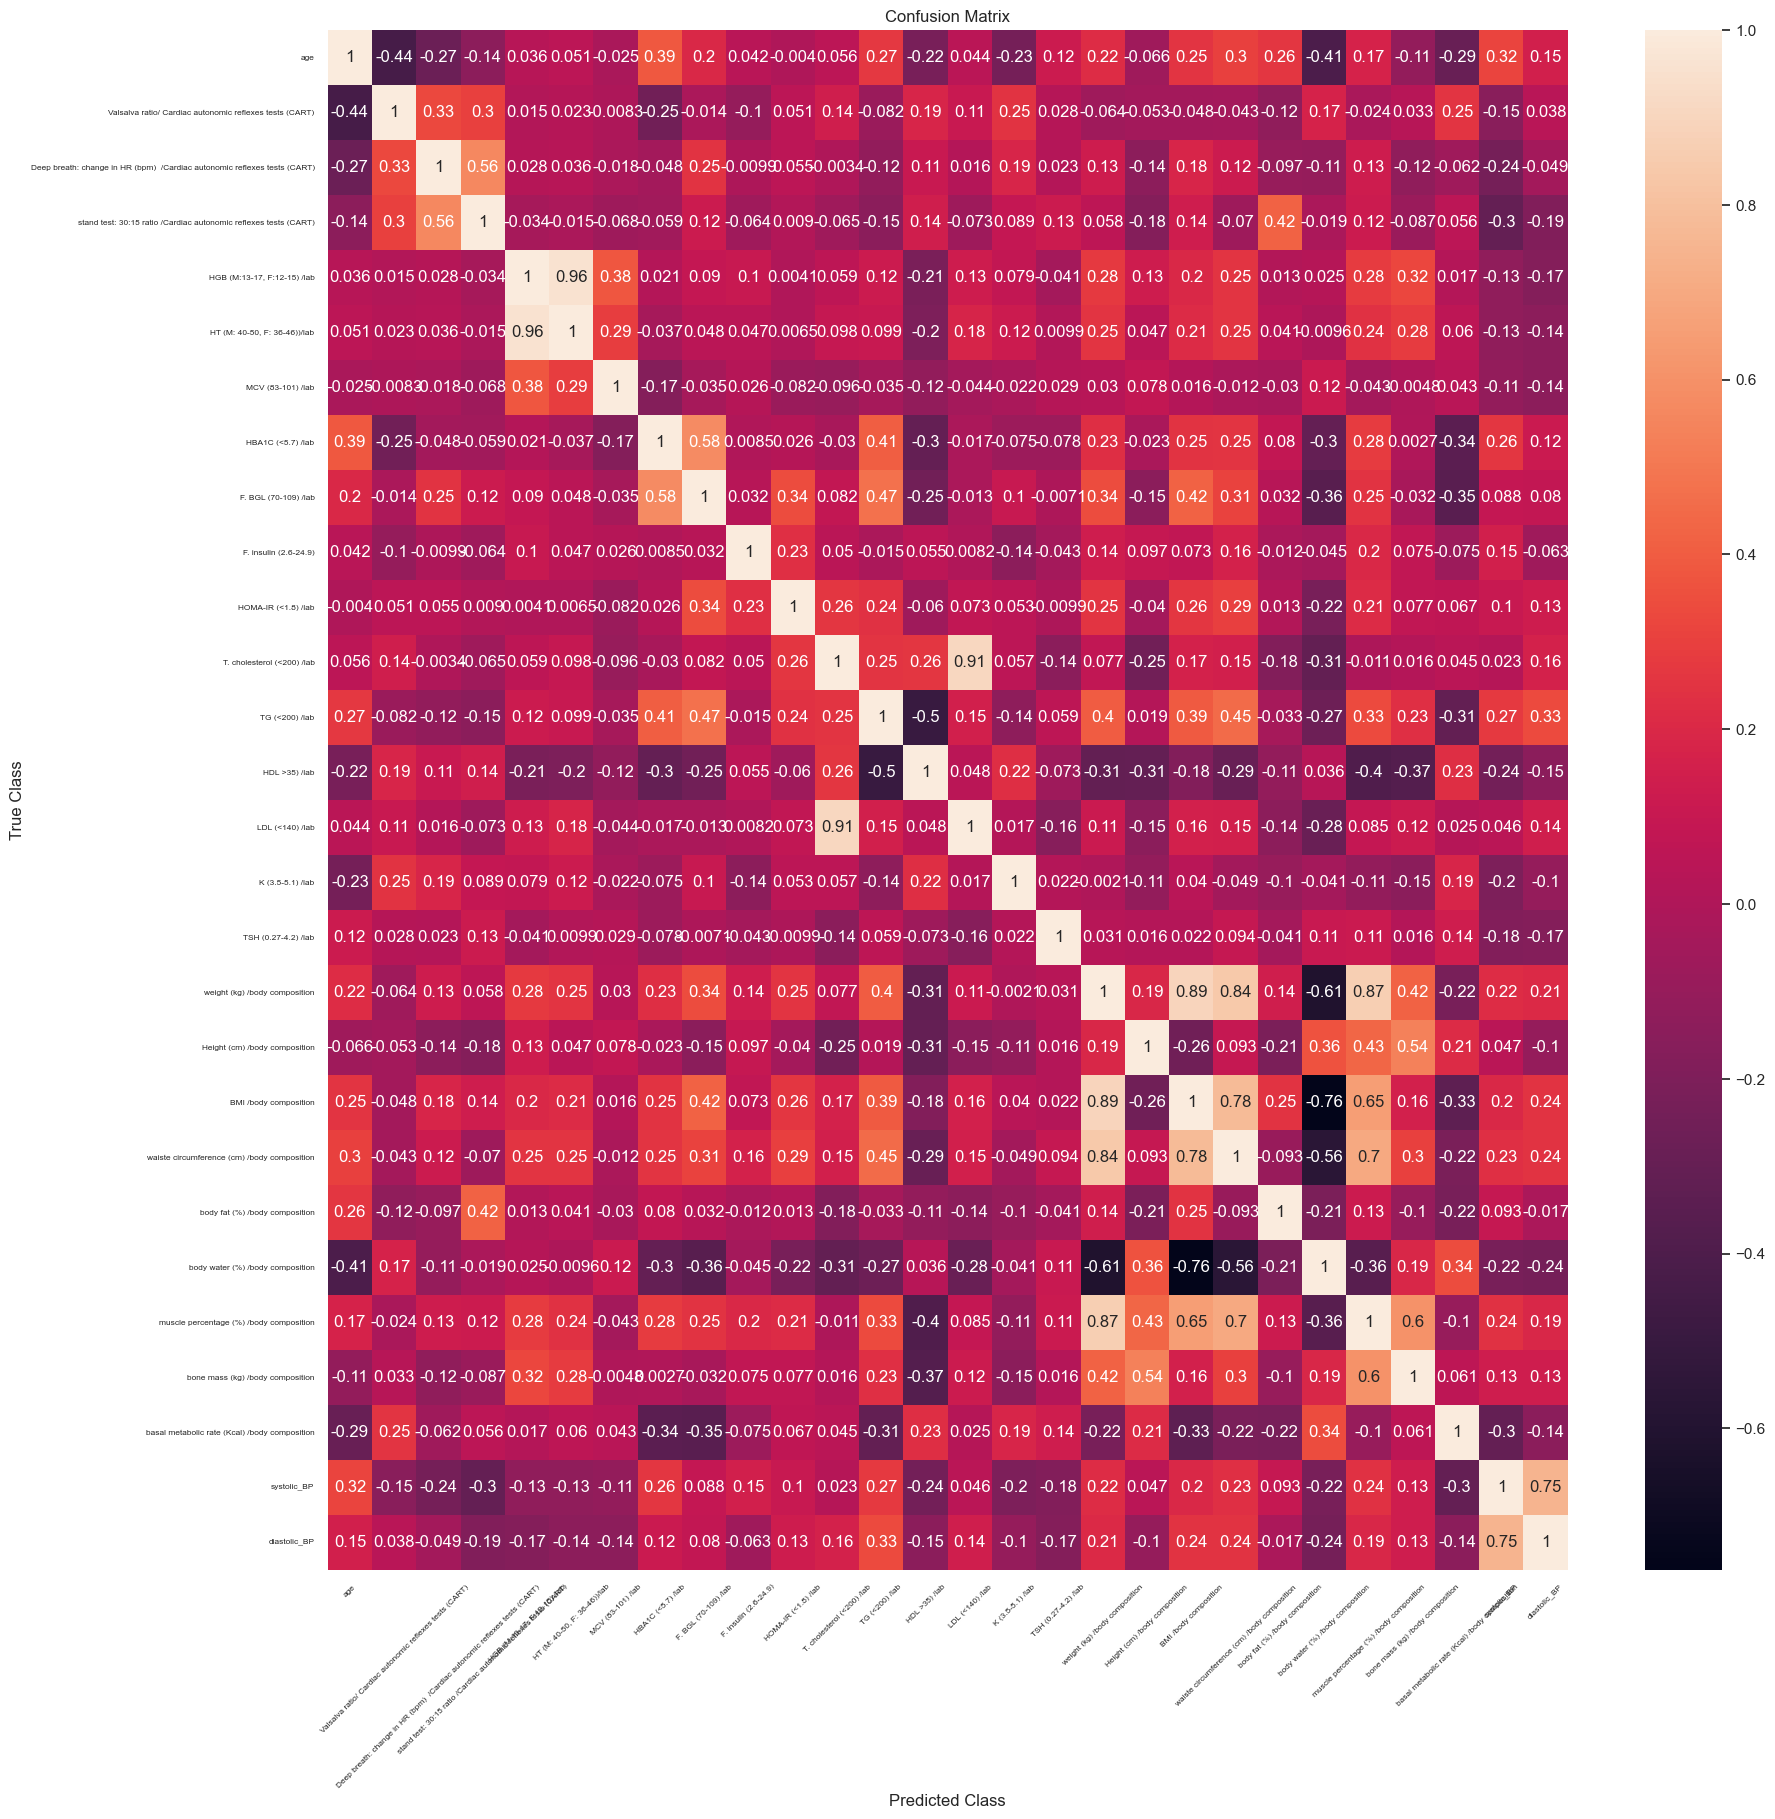

In [1686]:
plt.figure(figsize=(20, 20))
sns.heatmap(numeric_data.corr(), annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=6)
plt.show()


In [1687]:
# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

In [1688]:
# Step 2: K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=seed)
kmeans_labels = kmeans.fit_predict(scaled_data)





In [1689]:
from sklearn.mixture import GaussianMixture

# Step 1: Apply GMM Clustering
gmm = GaussianMixture(n_components=3, random_state=seed)
gmm_labels = gmm.fit_predict(scaled_data)

In [1690]:
# Add the labels to the DataFrame
data_cleaned['Cluster'] = gmm_labels

In [1691]:
# Step 3: Add cluster labels to the DataFrame
# data_cleaned['Cluster'] = kmeans_labels

In [1692]:
# Step 5: Map clusters to classes based on the most common label in each cluster
def assign_cluster_classes(row):
    if row['Cluster'] == 0:
        return 'Class 1'
    elif row['Cluster'] == 1:
        return 'Class 2'
    else:
        return 'Class 3'

# Create a mapping of cluster labels to class names
data_cleaned['Cluster Class'] = data_cleaned['Cluster'].map({0: 'Diabetic', 1: 'non-diabetic', 2: 'pre-diabetic'})

In [1693]:
# Step 4: Convert diabetic labels to string to ensure consistency
data_cleaned['Diabetic / pre-diabetic / Non-diabetic'] = data_cleaned['Diabetic / pre-diabetic / Non-diabetic)'].astype(str)
data_cleaned.drop(["Diabetic / pre-diabetic / Non-diabetic)"],axis=1,inplace=True)

In [1694]:
# Step 4: Compare the cluster output with the original diabetic labels
comparison_df = data_cleaned[['Diabetic / pre-diabetic / Non-diabetic', 'Cluster Class']]


In [1695]:
comparison_df.head()

,Diabetic / pre-diabetic / Non-diabetic,Cluster Class
0,non-diabetic,non-diabetic
1,non-diabetic,non-diabetic
2,Diabetic,Diabetic
3,Diabetic,pre-diabetic
4,non-diabetic,non-diabetic


In [1696]:
comparison_df.head()
# Step 5: Generate confusion matrix and classification report
conf_matrix = confusion_matrix(comparison_df['Diabetic / pre-diabetic / Non-diabetic'], comparison_df['Cluster Class'])
class_report = classification_report(comparison_df['Diabetic / pre-diabetic / Non-diabetic'], comparison_df['Cluster Class'])


In [1697]:
# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)




Confusion Matrix:
[[22  4  9]
 [ 2 37  5]
 [ 9  9  5]]


In [1698]:
# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)



# Display the classification report
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[22  4  9]
 [ 2 37  5]
 [ 9  9  5]]

Classification Report:
              precision    recall  f1-score   support

    Diabetic       0.67      0.63      0.65        35
non-diabetic       0.74      0.84      0.79        44
pre-diabetic       0.26      0.22      0.24        23

    accuracy                           0.63       102
   macro avg       0.56      0.56      0.56       102
weighted avg       0.61      0.63      0.62       102



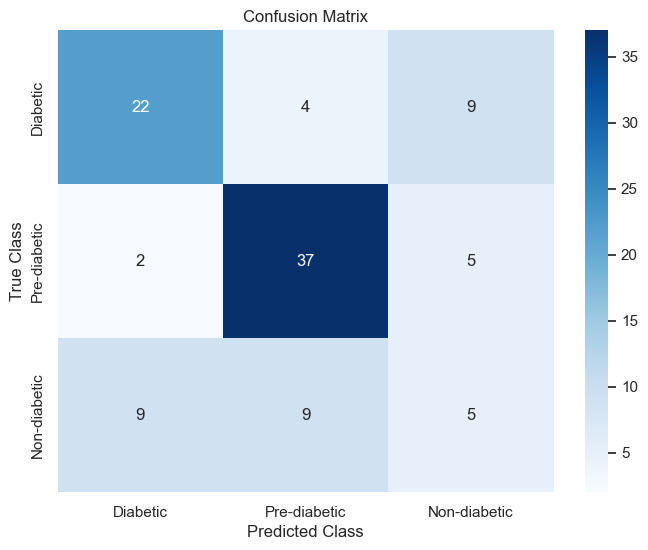

In [1699]:
# Step 6: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Diabetic', 'Pre-diabetic', 'Non-diabetic'],
            yticklabels=['Diabetic', 'Pre-diabetic', 'Non-diabetic'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

##### the data of Non-diabetic is very small so the model can not cluster it right not like (Diabetic and Pre-diabetic)

In [1700]:
scaled_data[:,0]

array([-0.07104702,  0.15308069,  0.90017307,  0.7507546 , -0.59401168,
       -1.04226711, -1.4158133 ,  1.27371926,  0.15308069, -1.11697635,
       -0.36988397,  1.19901002,  1.19901002,  1.3484285 , -0.66872092,
        0.67604536,  0.7507546 , -0.36988397, -0.29517473, -0.44459321,
       -0.2204655 ,  1.19901002,  0.97488231,  0.07837146,  0.7507546 ,
        1.27371926,  1.12430078,  1.57255621,  0.22778993,  1.04959155,
        0.07837146,  0.67604536,  1.72197469,  1.57255621,  0.82546383,
        0.7507546 ,  0.7507546 ,  1.04959155,  1.12430078, -0.14575626,
        1.12430078, -0.66872092,  1.9461024 ,  0.30249917,  1.19901002,
        0.22778993, -0.8181394 ,  1.3484285 ,  0.7507546 ,  0.45191764,
        0.07837146, -1.71465025, -0.2204655 ,  0.15308069, -0.2204655 ,
       -0.29517473, -0.51930245,  1.9461024 , -1.63994101, -1.56523178,
       -0.89284864, -1.26639482, -1.04226711,  0.45191764, -1.11697635,
       -1.63994101, -0.59401168, -0.59401168, -0.51930245,  0.82

In [1701]:
scaled_data.shape

(102, 28)

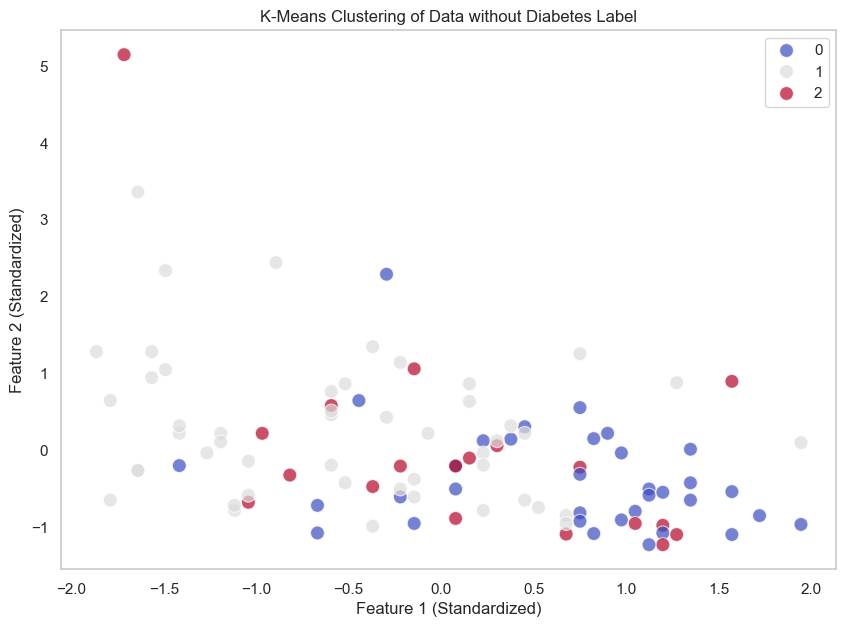

In [1702]:
# Step 6: Visualize the clustering results
plt.figure(figsize=(10, 7))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans_labels, palette='coolwarm', s=100, alpha=0.7)
plt.title('K-Means Clustering of Data without Diabetes Label')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.grid()
plt.show()

# using PCA to reduce DIM

In [1703]:

# Step 3: PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)

In [1704]:
# Create a DataFrame for PCA components
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = kmeans_labels

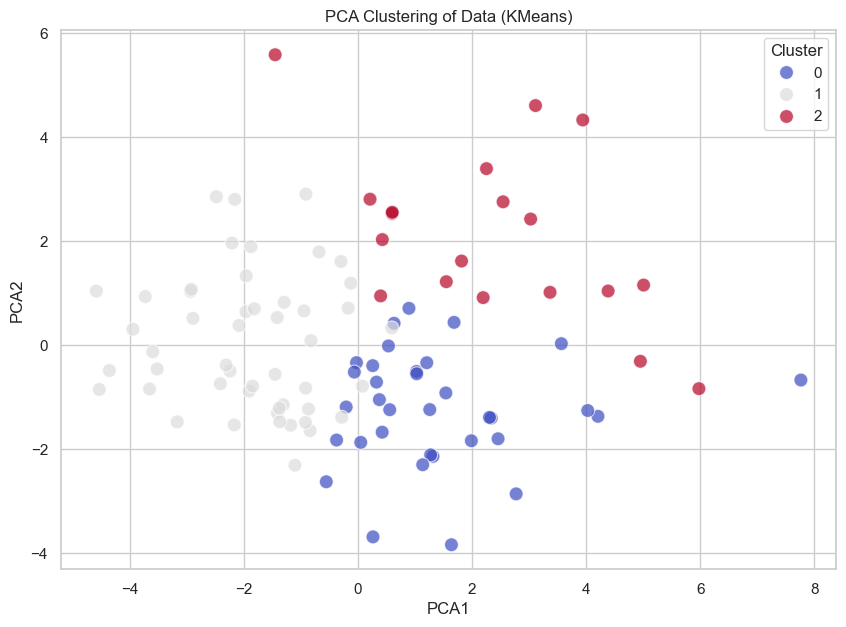

In [1705]:
# Step 4: Visualize the PCA components with clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='coolwarm', s=100, alpha=0.7)
plt.title('PCA Clustering of Data (KMeans)')
plt.show()

## Classification

In [1706]:
data_cleaned.head()

,gender,age,framingham score interpertation,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,...,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition,diseases,"SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)",systolic_BP,diastolic_BP,Cluster,Cluster Class,Diabetic / pre-diabetic / Non-diabetic
0,male,43.0,low,1.500000,23.333333,1.500000,8.7,26.6,70.7,5.6,...,0.554,3.7,1822.0,"confirmed infectve endocarditis, Rhematic hea...",no,110.0,70.0,1,non-diabetic,non-diabetic
1,male,46.0,high,1.722222,15.151515,1.111111,11.6,37.2,84.5,5.5,...,0.473,2.8,1565.0,rheumatic heart disease and suspected infectiv...,no,120.0,70.0,1,non-diabetic,non-diabetic
2,female,56.0,high,1.500000,15.151515,1.187500,11.6,34.4,79.1,7.4,...,0.410,0.7,1382.0,"recent NSTEMI, DM since 10 years, ACS since 2 ...",empagliflozin 10 mg,130.0,80.0,0,Diabetic,Diabetic
3,male,54.0,high,1.347826,12.500000,1.434783,12.2,40.3,84.5,5.7,...,0.579,2.9,1747.0,"HFrEF, DM since 3 years, HTN, Hx OF ACS, Hx OF...",empagliflozin 10 mg,90.0,60.0,2,pre-diabetic,Diabetic
4,male,36.0,low,1.583333,23.809524,1.250000,9.5,28.6,85.1,5.1,...,0.463,3.3,1545.0,"infective endocarditis, IV drug addict, cannab...",no,110.0,80.0,1,non-diabetic,non-diabetic


In [1707]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 35 columns):
 #   Column                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                 --------------  -----  
 0   gender                                                                                                                 102 non-null    object 
 1   age                                                                                                                    102 non-null    float64
 2   framingham score interpertation                                                                                        102 non-null    object 
 3   Valsalva ratio/ Cardiac autonomic reflexes tests (CART)                                                                102 non-null    float64
 4   De

In [1708]:
lab_columns = [col for col in data_cleaned.columns if col.endswith('/lab')]

In [1709]:
lab_data = data_cleaned[lab_columns]

In [1710]:
lab_data.head()

,"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,F. BGL (70-109) /lab,HOMA-IR (<1.8) /lab,T. cholesterol (<200) /lab,TG (<200) /lab,HDL >35) /lab,LDL (<140) /lab,K (3.5-5.1) /lab,TSH (0.27-4.2) /lab
0,8.7,26.6,70.7,5.6,89.0,0.4,135.0,157.0,32.0,72,4.1,2.10
1,11.6,37.2,84.5,5.5,91.0,0.9,241.0,124.0,29.0,187,4.2,3.40
2,11.6,34.4,79.1,7.4,321.0,7.4,269.6,247.0,31.0,99,4.5,3.72
3,12.2,40.3,84.5,5.7,86.0,0.9,132.0,204.0,31.0,60,3.9,30.70
4,9.5,28.6,85.1,5.1,100.0,2.6,141.0,67.0,42.0,86,4.1,4.12


In [1711]:
lab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HGB (M:13-17, F:12-15) /lab   102 non-null    float64
 1   HT (M: 40-50, F: 36-46))/lab  102 non-null    float64
 2   MCV (83-101) /lab             102 non-null    float64
 3   HBA1C (<5.7) /lab             102 non-null    float64
 4   F. BGL (70-109) /lab          102 non-null    float64
 5   HOMA-IR (<1.8) /lab           102 non-null    float64
 6   T. cholesterol (<200) /lab    102 non-null    float64
 7   TG (<200) /lab                102 non-null    float64
 8   HDL >35) /lab                 102 non-null    float64
 9   LDL (<140) /lab               102 non-null    int64  
 10  K (3.5-5.1) /lab              102 non-null    float64
 11  TSH (0.27-4.2) /lab           102 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 9.7 KB


In [1712]:
# Perform one-hot encoding for object columns
object_columns = data_cleaned.select_dtypes(include='object').columns



In [1713]:
object_columns

Index(['gender', 'framingham score interpertation', 'diseases',
       'SGLT2 /Drugs (home medication in red) , (hospital medication in green) & (at home and during hospitalization in blue)',
       'Cluster Class', 'Diabetic / pre-diabetic / Non-diabetic'],
      dtype='object')

In [1714]:
len(object_columns)

6

In [1715]:
object_df = data_cleaned[object_columns]

In [1716]:
toOHC_df =object_df[["gender","Diabetic / pre-diabetic / Non-diabetic"]]

In [1717]:
toOHC_df

,gender,Diabetic / pre-diabetic / Non-diabetic
0,male,non-diabetic
1,male,non-diabetic
2,female,Diabetic
3,male,Diabetic
4,male,non-diabetic
...,...,...
97,female,non-diabetic
98,female,non-diabetic
99,female,non-diabetic
100,female,non-diabetic


## One-hot encode

In [1718]:
# One-hot encode the object columns
df_encoded = pd.get_dummies(toOHC_df, columns=toOHC_df.columns,drop_first=True)

In [1719]:
df_encoded.head()

,gender_male,Diabetic / pre-diabetic / Non-diabetic_non-diabetic,Diabetic / pre-diabetic / Non-diabetic_pre-diabetic
0,True,True,False
1,True,True,False
2,False,False,False
3,True,False,False
4,True,True,False


# Trainning Part

In [1720]:
# Concatenate df_encoded with lab_data
Lab_X = pd.concat([df_encoded, lab_data], axis=1)

In [1721]:
Lab_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   gender_male                                          102 non-null    bool   
 1   Diabetic / pre-diabetic / Non-diabetic_non-diabetic  102 non-null    bool   
 2   Diabetic / pre-diabetic / Non-diabetic_pre-diabetic  102 non-null    bool   
 3   HGB (M:13-17, F:12-15) /lab                          102 non-null    float64
 4   HT (M: 40-50, F: 36-46))/lab                         102 non-null    float64
 5   MCV (83-101) /lab                                    102 non-null    float64
 6   HBA1C (<5.7) /lab                                    102 non-null    float64
 7   F. BGL (70-109) /lab                                 102 non-null    float64
 8   HOMA-IR (<1.8) /lab                                  102 non-null    f

In [1722]:
Lab_X.head()

,gender_male,Diabetic / pre-diabetic / Non-diabetic_non-diabetic,Diabetic / pre-diabetic / Non-diabetic_pre-diabetic,"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,F. BGL (70-109) /lab,HOMA-IR (<1.8) /lab,T. cholesterol (<200) /lab,TG (<200) /lab,HDL >35) /lab,LDL (<140) /lab,K (3.5-5.1) /lab,TSH (0.27-4.2) /lab
0,True,True,False,8.7,26.6,70.7,5.6,89.0,0.4,135.0,157.0,32.0,72,4.1,2.10
1,True,True,False,11.6,37.2,84.5,5.5,91.0,0.9,241.0,124.0,29.0,187,4.2,3.40
2,False,False,False,11.6,34.4,79.1,7.4,321.0,7.4,269.6,247.0,31.0,99,4.5,3.72
3,True,False,False,12.2,40.3,84.5,5.7,86.0,0.9,132.0,204.0,31.0,60,3.9,30.70
4,True,True,False,9.5,28.6,85.1,5.1,100.0,2.6,141.0,67.0,42.0,86,4.1,4.12


In [1723]:
y= data_cleaned["framingham score interpertation"]

In [1724]:
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [1725]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Lab_X, y, test_size=0.2, random_state=seed)

# Define models
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Initialize variables to store the best model information
best_model = None
best_accuracy = 0
best_model_name = ""

# Dictionary to store accuracy values for plotting
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Store accuracy for each model
    model_accuracies[name] = accuracy
    
    # Save the best model
    if accuracy > best_accuracy and accuracy != 1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model to a file
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Best model saved: {best_model_name} with accuracy: {best_accuracy:.2f}")


SVM Accuracy: 0.62
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86
Best model saved: Decision Tree with accuracy: 0.86


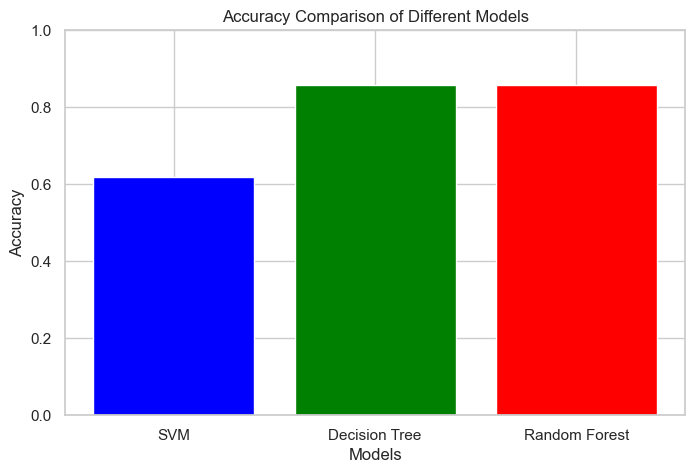

In [1726]:

# Plot the model accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

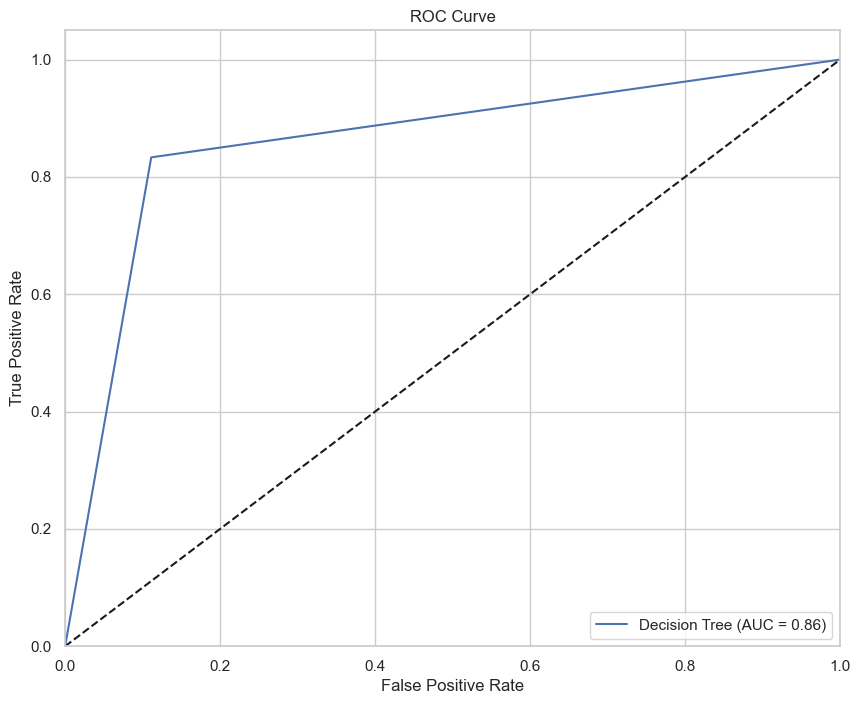

In [1727]:
# Draw the ROC curve for the final model
# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()  # Binarize the test labels

# Predict probabilities for ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

in AUC of 0.86 suggests that the Decision Tree model is quite effective at distinguishing between the classes in this dataset, making it a good candidate for your classification task.

#### SVM couldn't fit the data , decision tree fit the data with test acc 86*% and RandomForest is the same 

Now let's add the new features

In [1728]:
data_cleaned.columns

Index(['gender', 'age', 'framingham score interpertation',
       'Valsalva ratio/ Cardiac autonomic reflexes tests (CART)',
       'Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)',
       'stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)',
       'HGB (M:13-17, F:12-15) /lab', 'HT (M: 40-50, F: 36-46))/lab',
       'MCV (83-101) /lab', 'HBA1C (<5.7) /lab', 'F. BGL (70-109) /lab',
       'F. insulin (2.6-24.9)', 'HOMA-IR (<1.8) /lab',
       'T. cholesterol (<200) /lab', 'TG (<200) /lab', 'HDL >35) /lab',
       'LDL (<140) /lab', 'K (3.5-5.1) /lab', 'TSH (0.27-4.2) /lab',
       'weight (kg) /body composition', 'Height (cm) /body composition',
       'BMI /body composition', 'waiste circumference (cm) /body composition',
       'body fat (%) /body composition', 'body water (%) /body composition',
       'muscle percentage (%) /body composition',
       'bone mass (kg) /body composition',
       'basal metabolic rate (Kcal) /body composition',

In [1729]:
body_composition_columns = [col for col in data_cleaned.columns if col.endswith('body composition')]
cart_columns = [col for col in data_cleaned.columns if col.endswith('Cardiac autonomic reflexes tests (CART)')]

In [1730]:
body_composition_columns

['weight (kg) /body composition',
 'Height (cm) /body composition',
 'BMI /body composition',
 'waiste circumference (cm) /body composition',
 'body fat (%) /body composition',
 'body water (%) /body composition',
 'muscle percentage (%) /body composition',
 'bone mass (kg) /body composition',
 'basal metabolic rate (Kcal) /body composition']

In [1731]:
cart_columns

['Valsalva ratio/ Cardiac autonomic reflexes tests (CART)',
 'Deep breath: change in HR (bpm)  /Cardiac autonomic reflexes tests (CART)',
 'stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)']

In [1732]:
body_composition_data = data_cleaned[body_composition_columns]
cart_data = data_cleaned[cart_columns]

In [1733]:
body_composition_data.head()

,weight (kg) /body composition,Height (cm) /body composition,BMI /body composition,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition
0,84.8,177.0,27.1,94.0,0.300,0.511,0.554,3.7,1822.0
1,68.3,175.0,22.3,80.0,0.269,0.533,0.473,2.8,1565.0
2,72.8,156.0,29.9,100.0,0.436,0.411,0.410,0.7,1382.0
3,86.1,171.0,29.4,110.0,0.295,0.515,0.579,2.9,1747.0
4,61.1,175.0,20.0,77.0,0.189,0.592,0.463,3.3,1545.0


In [1734]:
cart_data.head()

,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART)
0,1.500000,23.333333,1.500000
1,1.722222,15.151515,1.111111
2,1.500000,15.151515,1.187500
3,1.347826,12.500000,1.434783
4,1.583333,23.809524,1.250000


In [1735]:
lab_data.head()

,"HGB (M:13-17, F:12-15) /lab","HT (M: 40-50, F: 36-46))/lab",MCV (83-101) /lab,HBA1C (<5.7) /lab,F. BGL (70-109) /lab,HOMA-IR (<1.8) /lab,T. cholesterol (<200) /lab,TG (<200) /lab,HDL >35) /lab,LDL (<140) /lab,K (3.5-5.1) /lab,TSH (0.27-4.2) /lab
0,8.7,26.6,70.7,5.6,89.0,0.4,135.0,157.0,32.0,72,4.1,2.10
1,11.6,37.2,84.5,5.5,91.0,0.9,241.0,124.0,29.0,187,4.2,3.40
2,11.6,34.4,79.1,7.4,321.0,7.4,269.6,247.0,31.0,99,4.5,3.72
3,12.2,40.3,84.5,5.7,86.0,0.9,132.0,204.0,31.0,60,3.9,30.70
4,9.5,28.6,85.1,5.1,100.0,2.6,141.0,67.0,42.0,86,4.1,4.12


In [1736]:
df_encoded.head()

,gender_male,Diabetic / pre-diabetic / Non-diabetic_non-diabetic,Diabetic / pre-diabetic / Non-diabetic_pre-diabetic
0,True,True,False
1,True,True,False
2,False,False,False
3,True,False,False
4,True,True,False


In [1737]:
target = data_cleaned["framingham score interpertation"]
target.head()

0     low
1    high
2    high
3    high
4     low
Name: framingham score interpertation, dtype: object

### here we want to try all possiable combinations of the above data to see what feature make the accuracy improve

In [1738]:
# Concatenate df_encoded with lab_data
X = pd.concat([df_encoded, cart_data, body_composition_data], axis=1)

In [1739]:
X.head()
# here are the data without the lab data

,gender_male,Diabetic / pre-diabetic / Non-diabetic_non-diabetic,Diabetic / pre-diabetic / Non-diabetic_pre-diabetic,Valsalva ratio/ Cardiac autonomic reflexes tests (CART),Deep breath: change in HR (bpm) /Cardiac autonomic reflexes tests (CART),stand test: 30:15 ratio /Cardiac autonomic reflexes tests (CART),weight (kg) /body composition,Height (cm) /body composition,BMI /body composition,waiste circumference (cm) /body composition,body fat (%) /body composition,body water (%) /body composition,muscle percentage (%) /body composition,bone mass (kg) /body composition,basal metabolic rate (Kcal) /body composition
0,True,True,False,1.500000,23.333333,1.500000,84.8,177.0,27.1,94.0,0.300,0.511,0.554,3.7,1822.0
1,True,True,False,1.722222,15.151515,1.111111,68.3,175.0,22.3,80.0,0.269,0.533,0.473,2.8,1565.0
2,False,False,False,1.500000,15.151515,1.187500,72.8,156.0,29.9,100.0,0.436,0.411,0.410,0.7,1382.0
3,True,False,False,1.347826,12.500000,1.434783,86.1,171.0,29.4,110.0,0.295,0.515,0.579,2.9,1747.0
4,True,True,False,1.583333,23.809524,1.250000,61.1,175.0,20.0,77.0,0.189,0.592,0.463,3.3,1545.0


In [1740]:
X = pd.concat([df_encoded, cart_data, body_composition_data], axis=1)

In [1741]:
#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
}

# Initialize variables to store the best model information
best_model = None
best_accuracy = 0
best_model_name = ""

# Dictionary to store accuracy values for plotting
model_accuracies = {}

# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    
    # Store accuracy for each model
    model_accuracies[name] = accuracy
    
    # Save the best model
    if accuracy > best_accuracy and accuracy < 1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

# Save the best model to a file
joblib.dump(best_model, f"{best_model_name}_best_model.pkl")
print(f"Best model saved: {best_model_name} with accuracy: {best_accuracy:.2f}")


SVM Accuracy: 0.76
Decision Tree Accuracy: 0.90
Random Forest Accuracy: 0.95
Best model saved: Random Forest with accuracy: 0.95


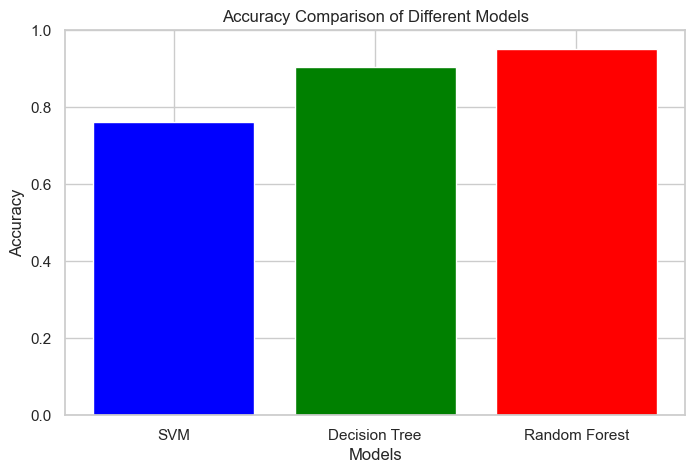

In [1742]:

# Plot the model accuracies
model_names = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

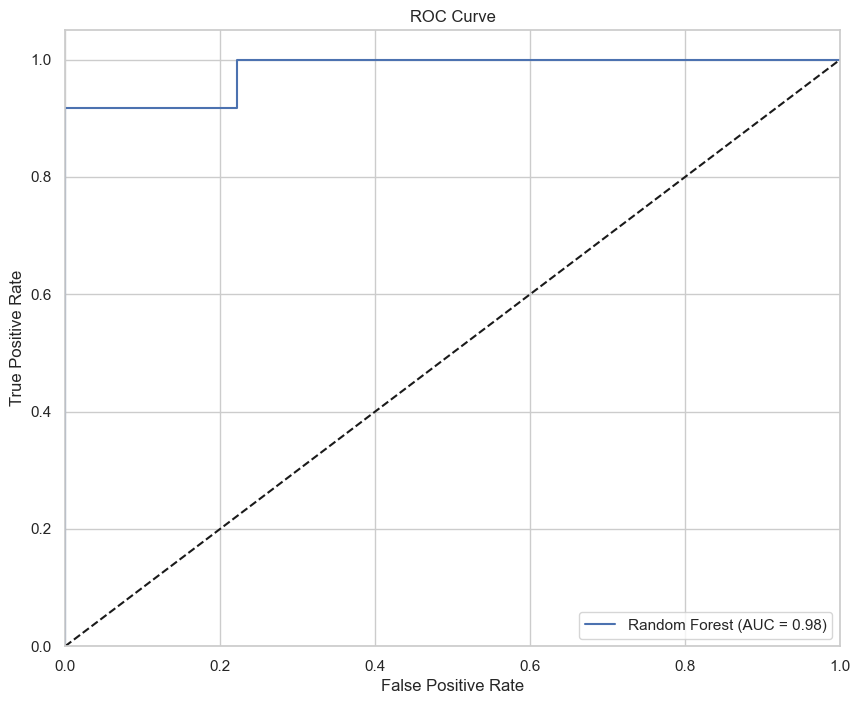

In [1743]:
# Draw the ROC curve for the final model
# Binarize the output
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()  # Binarize the test labels

# Predict probabilities for ROC curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f'{best_model_name} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### right now i will add the labs features one by one and see what will happen in accuracy

In [1744]:
from sklearn.preprocessing import LabelEncoder

In [1745]:
best_model = None
best_accuracy = 0
best_model_name = ""
accuracy_list= {}

for i in range(len(lab_data.columns)):
    
    X = pd.concat([df_encoded, cart_data, body_composition_data,lab_data.iloc[:,i]], axis=1)
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=seed)
    # Define models
    models = {
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier(),
        
    }
    # Train and evaluate each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        
        # Evaluate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_list[str(f"{lab_data.iloc[:,i].name} - {name} ")] = accuracy
        print(f"{name} Accuracy: {accuracy:.2f}")
        # Save the best model
        if accuracy > best_accuracy and accuracy !=1:
            best_accuracy = accuracy
            best_model = model
            best_model_name = name

    

SVM Accuracy: 0.76
Decision Tree Accuracy: 0.71
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.90
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.62
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.76
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.76
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.90
Random Forest Accuracy: 0.95
SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.95


In [1746]:
accuracy_list

{'HGB (M:13-17, F:12-15) /lab - SVM ': 0.7619047619047619,
 'HGB (M:13-17, F:12-15) /lab - Decision Tree ': 0.7142857142857143,
 'HGB (M:13-17, F:12-15) /lab - Random Forest ': 0.9523809523809523,
 'HT (M: 40-50, F: 36-46))/lab - SVM ': 0.7619047619047619,
 'HT (M: 40-50, F: 36-46))/lab - Decision Tree ': 0.9047619047619048,
 'HT (M: 40-50, F: 36-46))/lab - Random Forest ': 0.9523809523809523,
 'MCV (83-101) /lab - SVM ': 0.7619047619047619,
 'MCV (83-101) /lab - Decision Tree ': 0.8571428571428571,
 'MCV (83-101) /lab - Random Forest ': 0.9523809523809523,
 'HBA1C (<5.7) /lab - SVM ': 0.7619047619047619,
 'HBA1C (<5.7) /lab - Decision Tree ': 0.9523809523809523,
 'HBA1C (<5.7) /lab - Random Forest ': 0.9523809523809523,
 'F. BGL (70-109) /lab - SVM ': 0.7619047619047619,
 'F. BGL (70-109) /lab - Decision Tree ': 0.8571428571428571,
 'F. BGL (70-109) /lab - Random Forest ': 0.9523809523809523,
 'HOMA-IR (<1.8) /lab - SVM ': 0.7619047619047619,
 'HOMA-IR (<1.8) /lab - Decision Tree ': 0

In [1747]:

# Extracting unique lab tests and organizing the values by model
lab_tests = sorted(set(k.split('/')[0] for k in accuracy_list.keys()))
lab_tests

['F. BGL (70-109) ',
 'HBA1C (<5.7) ',
 'HDL >35) ',
 'HGB (M:13-17, F:12-15) ',
 'HOMA-IR (<1.8) ',
 'HT (M: 40-50, F: 36-46))',
 'K (3.5-5.1) ',
 'LDL (<140) ',
 'MCV (83-101) ',
 'T. cholesterol (<200) ',
 'TG (<200) ',
 'TSH (0.27-4.2) ']

In [1748]:
# Group values by model
svm_values = [v for k, v in accuracy_list.items() if 'SVM' in k]
dt_values = [v for k, v in accuracy_list.items() if 'Decision Tree' in k]
rf_values = [v for k, v in accuracy_list.items() if 'Random Forest' in k]



In [1749]:
len(svm_values)

12

In [1750]:
# Bar width and positions
bar_width = 0.2
index = np.arange(len(lab_tests))
index

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

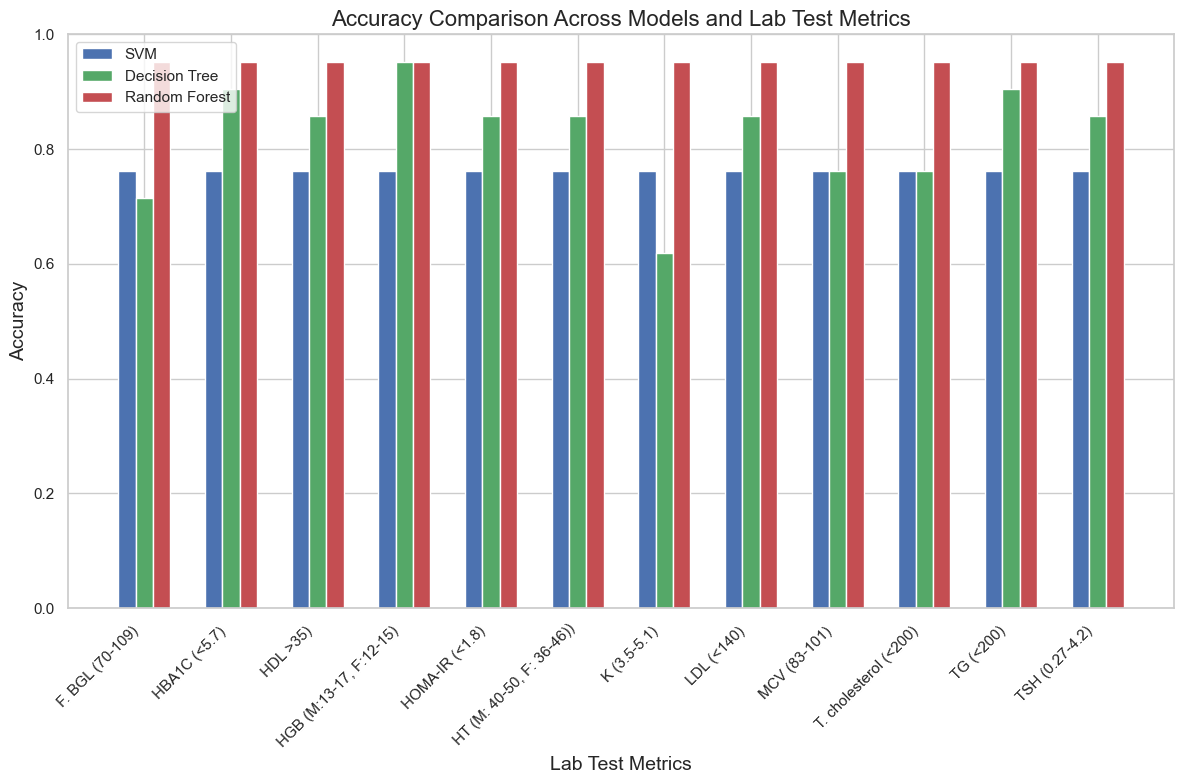

In [1751]:


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot bars for each model
ax.bar(index, svm_values, bar_width, label='SVM', color='b')
ax.bar(index + bar_width, dt_values, bar_width, label='Decision Tree', color='g')
ax.bar(index + 2 * bar_width, rf_values, bar_width, label='Random Forest', color='r')

# Add labels, title, and custom x-axis tick labels
ax.set_xlabel('Lab Test Metrics', fontsize=14)
ax.set_ylabel('Accuracy', fontsize=14)
ax.set_title('Accuracy Comparison Across Models and Lab Test Metrics', fontsize=16)
ax.set_xticks(index + bar_width)
ax.set_xticklabels(lab_tests, rotation=45, ha="right")

# Add legend
ax.legend()

# Show plot
plt.tight_layout()
plt.show()

In [1752]:
def plot_sorted_accuracies(data, models):
    """
    Plots sorted accuracies of models across features and returns all accuracies in sorted format.
    
    Parameters:
    - data: Dictionary where keys are feature-model combinations and values are accuracy scores.
    - models: List of model names to plot (e.g., ["SVM", "Decision Tree", "Random Forest"])
    
    Returns:
    - List of all accuracies in the format (feature, accuracy, model) sorted by accuracy.
    """
    # Extract features by removing model names
    features = list(set([key.split(" - ")[0] for key in data.keys()]))

    # Initialize accuracy lists for each model
    model_accuracies = {model: [] for model in models}

    # Fill the accuracies for each feature-model pair
    for feature in features:
        for model in models:
            key = f"{feature} - {model} "
            model_accuracies[model].append((feature, data.get(key, 0)))  # (feature, accuracy)

    # Prepare a list to hold all accuracies in the desired format
    all_accuracies = []

    # Collect all accuracies in the specified format
    for model in models:
        for feature, accuracy in model_accuracies[model]:
            all_accuracies.append((feature, accuracy, model))

    # Sort the list of all accuracies by accuracy in descending order
    all_accuracies.sort(key=lambda x: x[1], reverse=True)

    # Prepare data for plotting
    sorted_features = [feature for feature, _ in model_accuracies[models[0]]]  # Sorted by first model
    sorted_accuracies = {model: [acc for _, acc in model_accuracies[model]] for model in models}

    # Bar plot settings
    index = np.arange(len(sorted_features))
    bar_width = 0.2

    fig, ax = plt.subplots(figsize=(12, 8))

    # Plot bars for each model
    for i, model in enumerate(models):
        ax.bar(index + i * bar_width, sorted_accuracies[model], bar_width, label=model)

    # Add labels, title, and legend
    ax.set_xlabel('Features')
    ax.set_ylabel('Accuracy')
    ax.set_title('Sorted Model Accuracy Comparison Across Features')
    ax.set_xticks(index + bar_width)
    ax.set_xticklabels(sorted_features, rotation=90)
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

    return all_accuracies

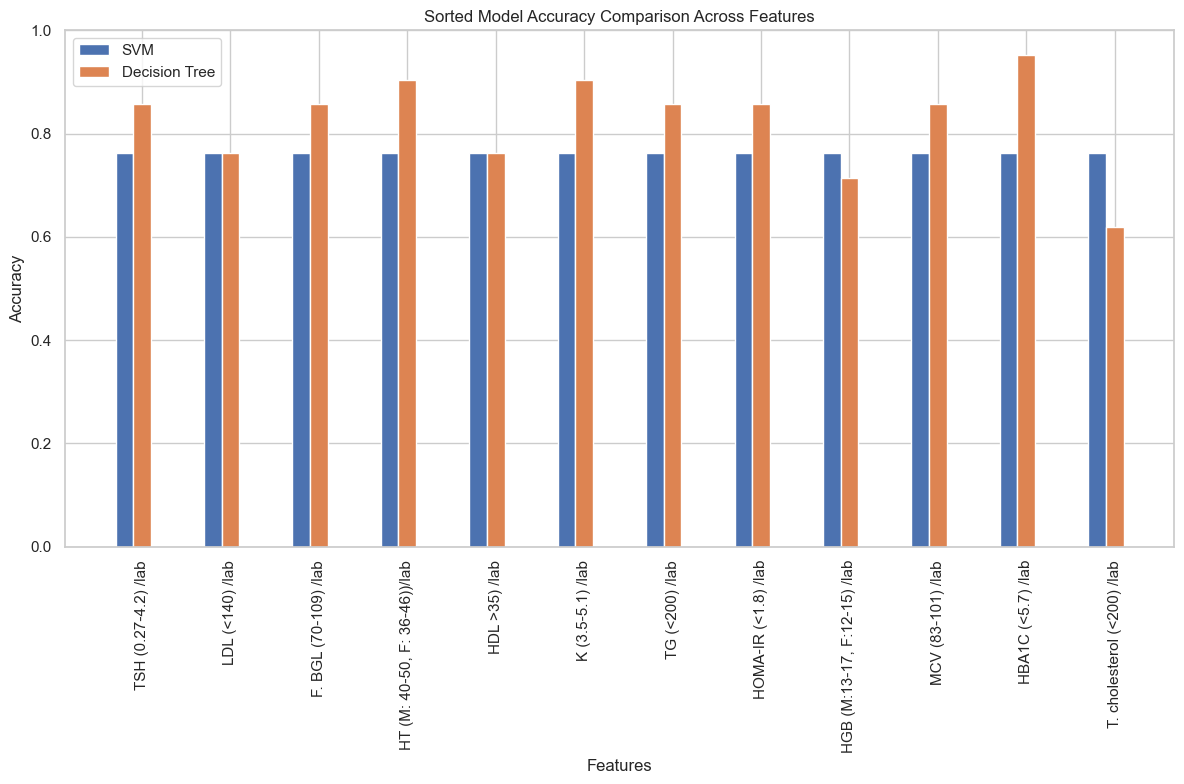

[('HBA1C (<5.7) /lab', 0.9523809523809523, 'Decision Tree'),
 ('HT (M: 40-50, F: 36-46))/lab', 0.9047619047619048, 'Decision Tree'),
 ('K (3.5-5.1) /lab', 0.9047619047619048, 'Decision Tree'),
 ('TSH (0.27-4.2) /lab', 0.8571428571428571, 'Decision Tree'),
 ('F. BGL (70-109) /lab', 0.8571428571428571, 'Decision Tree'),
 ('TG (<200) /lab', 0.8571428571428571, 'Decision Tree'),
 ('HOMA-IR (<1.8) /lab', 0.8571428571428571, 'Decision Tree'),
 ('MCV (83-101) /lab', 0.8571428571428571, 'Decision Tree'),
 ('TSH (0.27-4.2) /lab', 0.7619047619047619, 'SVM'),
 ('LDL (<140) /lab', 0.7619047619047619, 'SVM'),
 ('F. BGL (70-109) /lab', 0.7619047619047619, 'SVM'),
 ('HT (M: 40-50, F: 36-46))/lab', 0.7619047619047619, 'SVM'),
 ('HDL >35) /lab', 0.7619047619047619, 'SVM'),
 ('K (3.5-5.1) /lab', 0.7619047619047619, 'SVM'),
 ('TG (<200) /lab', 0.7619047619047619, 'SVM'),
 ('HOMA-IR (<1.8) /lab', 0.7619047619047619, 'SVM'),
 ('HGB (M:13-17, F:12-15) /lab', 0.7619047619047619, 'SVM'),
 ('MCV (83-101) /lab'

In [1753]:
plot_sorted_accuracies(accuracy_list,  ["SVM", "Decision Tree"])


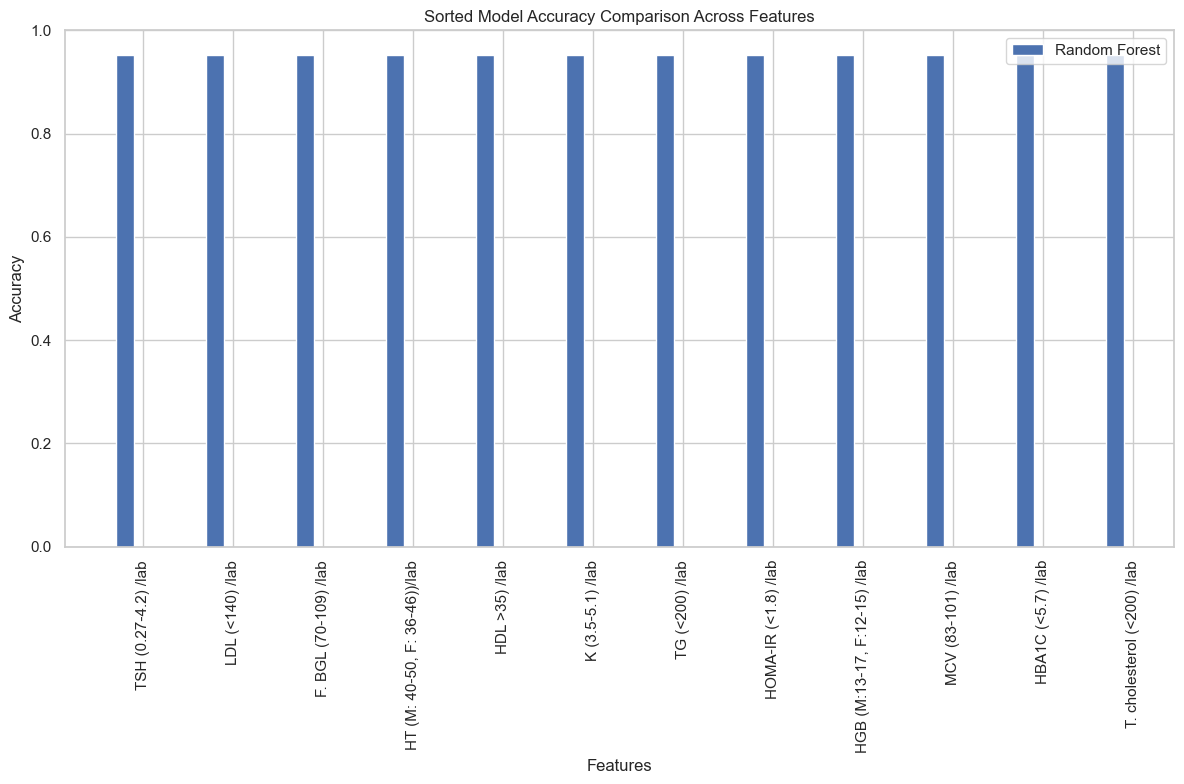

In [1754]:
Random_Forest_accuracies = plot_sorted_accuracies(accuracy_list,  ["Random Forest"])

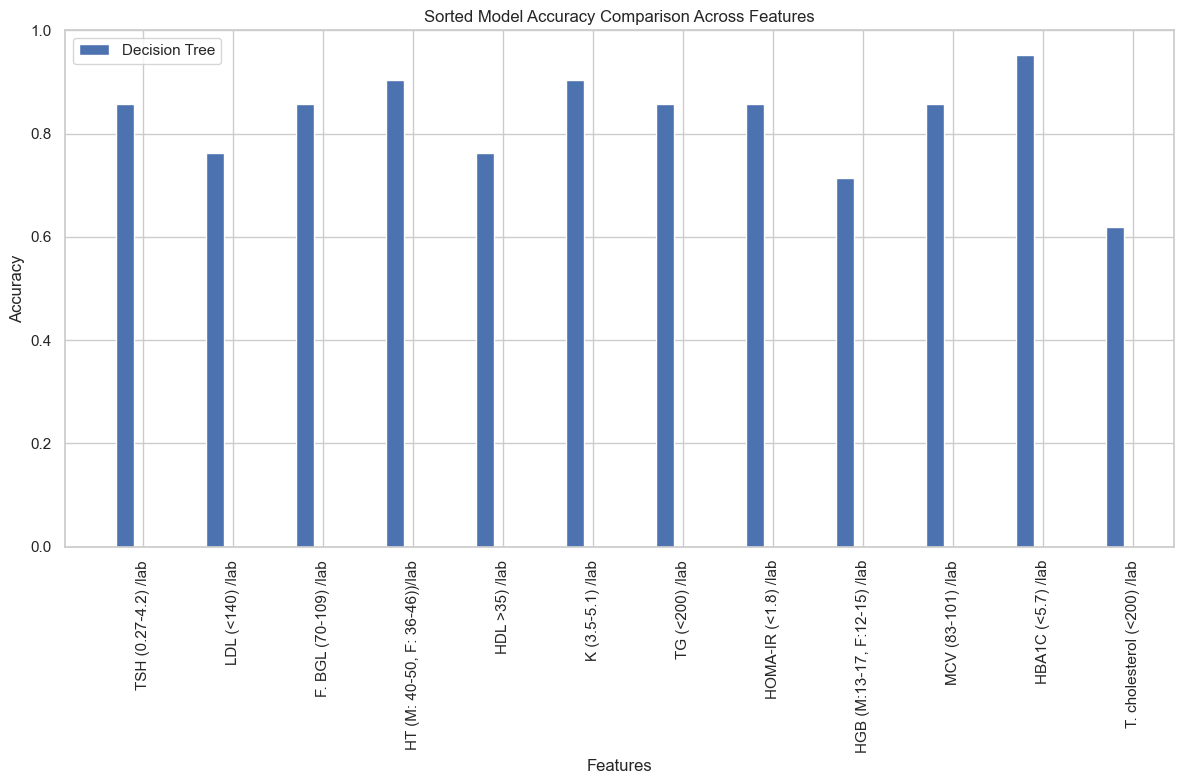

In [1755]:
Decision_Tree_accuracies = plot_sorted_accuracies(accuracy_list,  ["Decision Tree"])

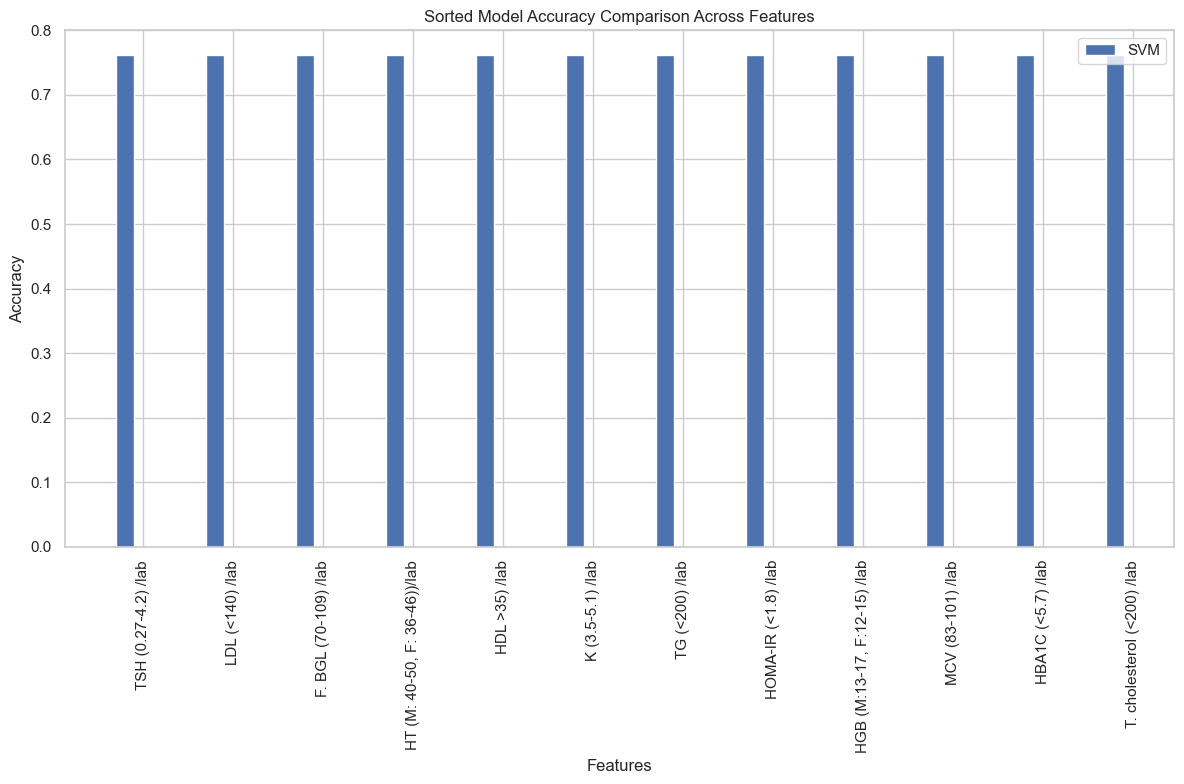

In [1756]:
svm_accuracies =  plot_sorted_accuracies(accuracy_list,  ["SVM"])

In [1757]:
Random_Forest_accuracies 


[('TSH (0.27-4.2) /lab', 0.9523809523809523, 'Random Forest'),
 ('LDL (<140) /lab', 0.9523809523809523, 'Random Forest'),
 ('F. BGL (70-109) /lab', 0.9523809523809523, 'Random Forest'),
 ('HT (M: 40-50, F: 36-46))/lab', 0.9523809523809523, 'Random Forest'),
 ('HDL >35) /lab', 0.9523809523809523, 'Random Forest'),
 ('K (3.5-5.1) /lab', 0.9523809523809523, 'Random Forest'),
 ('TG (<200) /lab', 0.9523809523809523, 'Random Forest'),
 ('HOMA-IR (<1.8) /lab', 0.9523809523809523, 'Random Forest'),
 ('HGB (M:13-17, F:12-15) /lab', 0.9523809523809523, 'Random Forest'),
 ('MCV (83-101) /lab', 0.9523809523809523, 'Random Forest'),
 ('HBA1C (<5.7) /lab', 0.9523809523809523, 'Random Forest'),
 ('T. cholesterol (<200) /lab', 0.9523809523809523, 'Random Forest')]

In [1758]:
Decision_Tree_accuracies

[('HBA1C (<5.7) /lab', 0.9523809523809523, 'Decision Tree'),
 ('HT (M: 40-50, F: 36-46))/lab', 0.9047619047619048, 'Decision Tree'),
 ('K (3.5-5.1) /lab', 0.9047619047619048, 'Decision Tree'),
 ('TSH (0.27-4.2) /lab', 0.8571428571428571, 'Decision Tree'),
 ('F. BGL (70-109) /lab', 0.8571428571428571, 'Decision Tree'),
 ('TG (<200) /lab', 0.8571428571428571, 'Decision Tree'),
 ('HOMA-IR (<1.8) /lab', 0.8571428571428571, 'Decision Tree'),
 ('MCV (83-101) /lab', 0.8571428571428571, 'Decision Tree'),
 ('LDL (<140) /lab', 0.7619047619047619, 'Decision Tree'),
 ('HDL >35) /lab', 0.7619047619047619, 'Decision Tree'),
 ('HGB (M:13-17, F:12-15) /lab', 0.7142857142857143, 'Decision Tree'),
 ('T. cholesterol (<200) /lab', 0.6190476190476191, 'Decision Tree')]

In [1759]:
svm_accuracies

[('TSH (0.27-4.2) /lab', 0.7619047619047619, 'SVM'),
 ('LDL (<140) /lab', 0.7619047619047619, 'SVM'),
 ('F. BGL (70-109) /lab', 0.7619047619047619, 'SVM'),
 ('HT (M: 40-50, F: 36-46))/lab', 0.7619047619047619, 'SVM'),
 ('HDL >35) /lab', 0.7619047619047619, 'SVM'),
 ('K (3.5-5.1) /lab', 0.7619047619047619, 'SVM'),
 ('TG (<200) /lab', 0.7619047619047619, 'SVM'),
 ('HOMA-IR (<1.8) /lab', 0.7619047619047619, 'SVM'),
 ('HGB (M:13-17, F:12-15) /lab', 0.7619047619047619, 'SVM'),
 ('MCV (83-101) /lab', 0.7619047619047619, 'SVM'),
 ('HBA1C (<5.7) /lab', 0.7619047619047619, 'SVM'),
 ('T. cholesterol (<200) /lab', 0.7619047619047619, 'SVM')]

In [1760]:
def average_accuracy(list1, list2, list3):
    # Combine all lists into a single dictionary to aggregate scores
    accuracy_dict = {}
    
    # Helper function to process each list and update the dictionary
    def process_list(lst):
        for test, accuracy, model in lst:
            if test not in accuracy_dict:
                accuracy_dict[test] = []
            accuracy_dict[test].append(accuracy)

    # Process each input list
    process_list(list1)
    process_list(list2)
    process_list(list3)

    # Calculate average accuracy for each lab test
    average_results = []
    for test, accuracies in accuracy_dict.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        average_results.append((test, average_accuracy))
    
    return average_results

In [1761]:
average_accuracy =average_accuracy(Random_Forest_accuracies, Decision_Tree_accuracies, svm_accuracies)

In [1762]:
sorted_averages = sorted(average_accuracy, key=lambda x: x[1], reverse=True)

In [1763]:
sorted_averages

[('HBA1C (<5.7) /lab', 0.8888888888888888),
 ('HT (M: 40-50, F: 36-46))/lab', 0.873015873015873),
 ('K (3.5-5.1) /lab', 0.873015873015873),
 ('TSH (0.27-4.2) /lab', 0.8571428571428571),
 ('F. BGL (70-109) /lab', 0.8571428571428571),
 ('TG (<200) /lab', 0.8571428571428571),
 ('HOMA-IR (<1.8) /lab', 0.8571428571428571),
 ('MCV (83-101) /lab', 0.8571428571428571),
 ('LDL (<140) /lab', 0.8253968253968255),
 ('HDL >35) /lab', 0.8253968253968255),
 ('HGB (M:13-17, F:12-15) /lab', 0.8095238095238094),
 ('T. cholesterol (<200) /lab', 0.7777777777777777)]

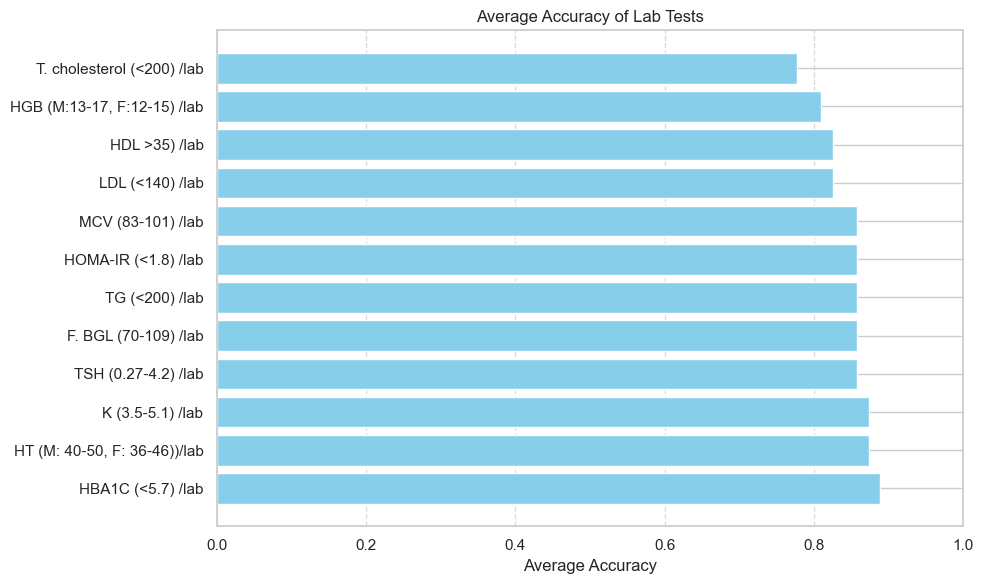

In [1764]:
# Unzip the data into two lists: tests and accuracies
tests, accuracies = zip(*sorted_averages)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(tests, accuracies, color='skyblue')
plt.xlabel('Average Accuracy')
plt.title('Average Accuracy of Lab Tests')
plt.xlim(0, 1)  # Set x-axis limits to 0-1 for better visualization
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()  # Adjust layout to make room for labels
plt.show()

## include all lab test to the model and see the output

In [1765]:
X = pd.concat([df_encoded, cart_data, body_composition_data,lab_data], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)
# Define models

models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    
}
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"{name} Accuracy: {accuracy:.2f}")
    # Save the best model
    if accuracy > best_accuracy and accuracy !=1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

SVM Accuracy: 0.76
Decision Tree Accuracy: 0.86
Random Forest Accuracy: 0.86


In [1766]:
# Filter lab tests with scores greater than 0.87
filtered_tests = [test for test in sorted_averages if test[1] > 0.87]
improve_acc_names= []
# Print the filtered lab tests
for test in filtered_tests:
    improve_acc_names.append(test[0])

In [1767]:
improve_acc_names

['HBA1C (<5.7) /lab', 'HT (M: 40-50, F: 36-46))/lab', 'K (3.5-5.1) /lab']

In [1768]:
data_to_add = lab_data[improve_acc_names]

In [1769]:
X = pd.concat([df_encoded, cart_data, body_composition_data,data_to_add], axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=seed)
# Define models
final_acc= {}
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    
}
# Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    final_acc[name] = accuracy
    if name !="SVM":
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    print(f"{name} Accuracy: {accuracy:.2f}")
    # Save the best model
    if accuracy > best_accuracy and accuracy !=1:
        best_accuracy = accuracy
        best_model = model
        best_model_name = name

SVM Accuracy: 0.76
Decision Tree Accuracy: 0.95
Random Forest Accuracy: 0.95


In [1770]:
final_acc

{'SVM': 0.7619047619047619,
 'Decision Tree': 0.9523809523809523,
 'Random Forest': 0.9523809523809523}

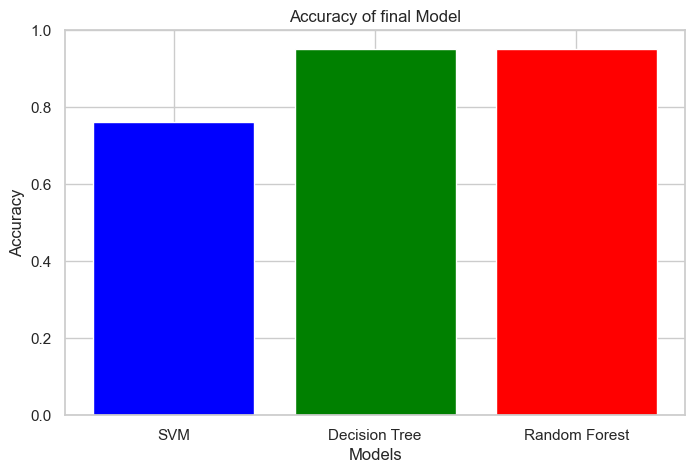

In [1771]:
# Plot the model accuracies
model_names = list(final_acc.keys())
accuracies = list(final_acc.values())

plt.figure(figsize=(8, 5))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of final Model')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

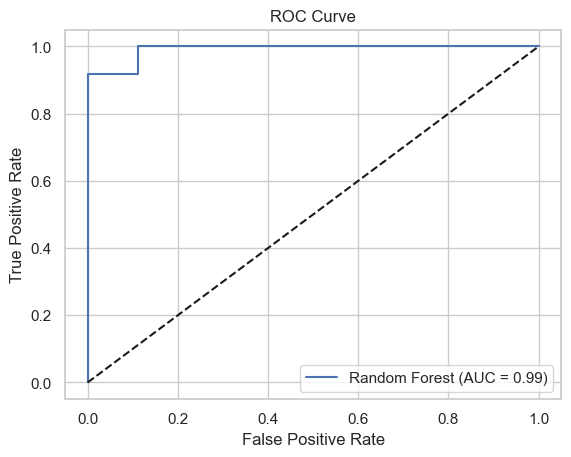

In [1772]:
from sklearn.metrics import roc_curve, roc_auc_score
#  Binarize the test labels
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test_bin, y_pred_prob)
roc_auc = roc_auc_score(y_test_bin, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()